# COVID-19 PREDICTION : INTERPRETATION OF MODEL PERFORMANCE

## DATASET DESCRIPTION

The COVID-19 pandemic is the defining global health crisis of our time and the greatest global humanitarian challenge the world has faced since World War II. The virus has spread widely, and the number of cases is rising daily as governments work to slow its spread.India has moved quickly, implementing a proactive, nationwide, lockdown, with the goal of flattening the curve and using the time to plan and resource responses adequately.¶


The number of new cases are increasing day by day around the world. This dataset has information on the impact of covid-19 at daily level.

This Dataset is from https://covid19.who.int/info/


### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NOTEBOOK SETUP

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

### LOAD THE DATA

In [3]:
raw_data = pd.read_csv("WHO-COVID-19-global-data.csv")

In [4]:
df = raw_data.copy()

### ANALYSIS OF DATASET

In [5]:
df.shape

(167322, 8)

Our Global dataset has 167322 rows with 8 features

In [6]:
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

This gives us a sample view on the features of the dataset 

In [7]:
df.Country.nunique()

237

Dataset consist of 237 countries data on the Covid-19 attack.

#### GROUPING COUNTRY WISE DATA

In [8]:
country_wise_data = df.groupby(['Country']).sum()

In [9]:
country_wise_data.head()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
Country                                                                   
Afghanistan        157508          44383143        7317            1906537
Albania            202295          49892867        3122             883626
Algeria            211859          62573950        6114            1792357
American Samoa         10               331           0                  0
Andorra             18815           5265927         133              56889

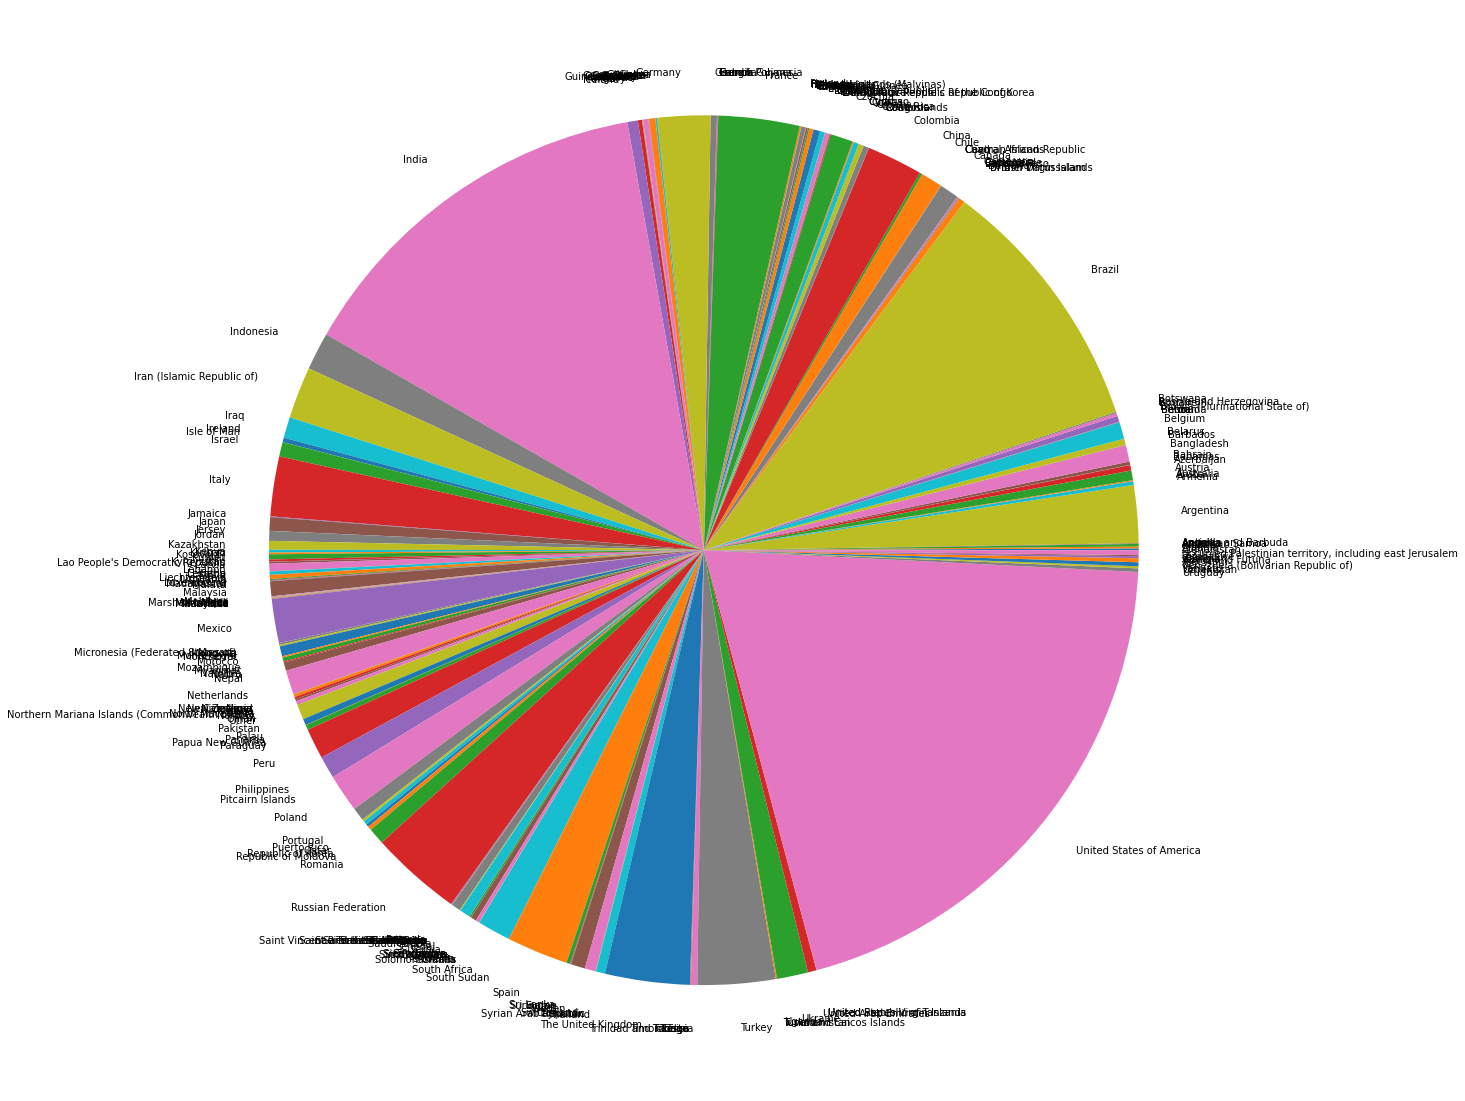

In [10]:
plt.figure(figsize=(50,20))
plt.pie(country_wise_data.Cumulative_cases,labels=country_wise_data.index)
plt.show()

We may see that United States of America, India and Brazil are top 3 affected countries among the world.

So it very important for us to follow social distancing, wearing mask, using sanitizer and other precautionary measures.

### SPLITING OF DATASET : INDIA 

In [11]:
df_india = df[df['Country']=='India'].reset_index()

In [12]:
df_india.head()

index Date_reported Country_code Country WHO_region  New_cases  \
0  67776    2020-01-03           IN   India      SEARO          0   
1  67777    2020-01-04           IN   India      SEARO          0   
2  67778    2020-01-05           IN   India      SEARO          0   
3  67779    2020-01-06           IN   India      SEARO          0   
4  67780    2020-01-07           IN   India      SEARO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [13]:
df_india.tail()

index Date_reported Country_code Country WHO_region  New_cases  \
701  68477    2021-12-04           IN   India      SEARO       8603   
702  68478    2021-12-05           IN   India      SEARO       8895   
703  68479    2021-12-06           IN   India      SEARO       8306   
704  68480    2021-12-07           IN   India      SEARO       6822   
705  68481    2021-12-08           IN   India      SEARO       8439   

     Cumulative_cases  New_deaths  Cumulative_deaths  
701          34624360         415             470530  
702          34633255        2796             473326  
703          34641561         211             473537  
704          34648383         220             473757  
705          34656822         195             473952

In [14]:
df_india.shape

(706, 9)

Our Dataset consist of New Cases, Cumulative Cases, New Deaths and Cumulative Deaths on daily frequency from Jan-3-2020 to Dec-08-2021

### STEP - 1 : DATA PREPROCESSING

In [15]:
df_india.drop(['index','Country_code','Country','WHO_region','Cumulative_cases','Cumulative_deaths'],axis=1,inplace=True)

We have dropped unneccessary columns from the dataset

In [16]:
df_india.Date_reported = pd.to_datetime(df_india.Date_reported,yearfirst=True)

We have changed the String column of Date to Python DateTime Object

In [17]:
df_india.set_index('Date_reported',inplace=True)

In [18]:
df_india.isnull().sum()

New_cases     0
New_deaths    0
dtype: int64

Our Dataset has no missing values.

In [19]:
df_india.head()

New_cases  New_deaths
Date_reported                       
2020-01-03             0           0
2020-01-04             0           0
2020-01-05             0           0
2020-01-06             0           0
2020-01-07             0           0

### STEP - 2 : DATA VISUALIZATION (SEASONAL TREND DECOMPOSITION)

In [20]:
from statsmodels.tsa.seasonal import STL

In [21]:
stl = STL(df_india.New_cases)
df_New_Cases_decompose = stl.fit()

stl = STL(df_india.New_deaths)
df_New_Deaths_decompose = stl.fit()

##### NEW CASES 

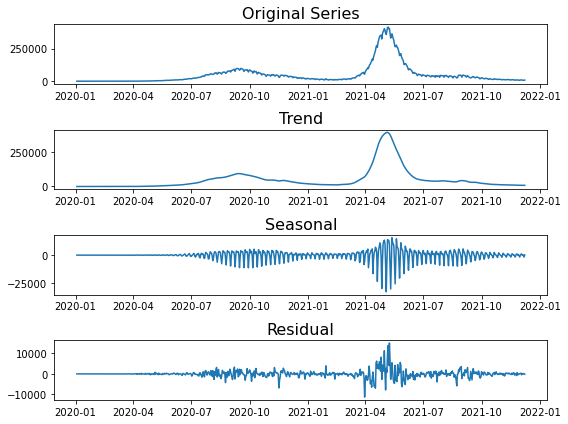

In [22]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df_india.New_cases)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(df_New_Cases_decompose.trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(df_New_Cases_decompose.seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(df_New_Cases_decompose.resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

##### NEW DEATHS

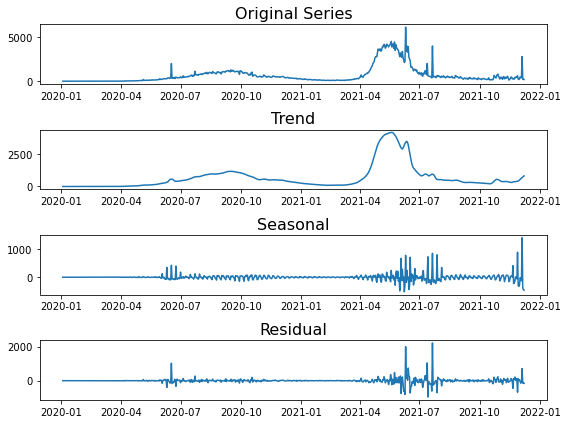

In [23]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df_india.New_deaths)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(df_New_Deaths_decompose.trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(df_New_Deaths_decompose.seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(df_New_Deaths_decompose.resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

### STEP - 3 : STATIONARITY CHECKING

In [24]:
from statsmodels.tsa.stattools import adfuller   

In [25]:
def test_stationarity(timeseries):
    
    fig = plt.figure(figsize=(20, 5))

    orig = plt.plot(timeseries, color='blue',label='Original')
    plt.legend(loc='best')
    plt.title('TIME SERIES PLOT')
    plt.show()
    
    print('\n\nADFULLER TEST RESULTS : \n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
              dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#### NEW CASES

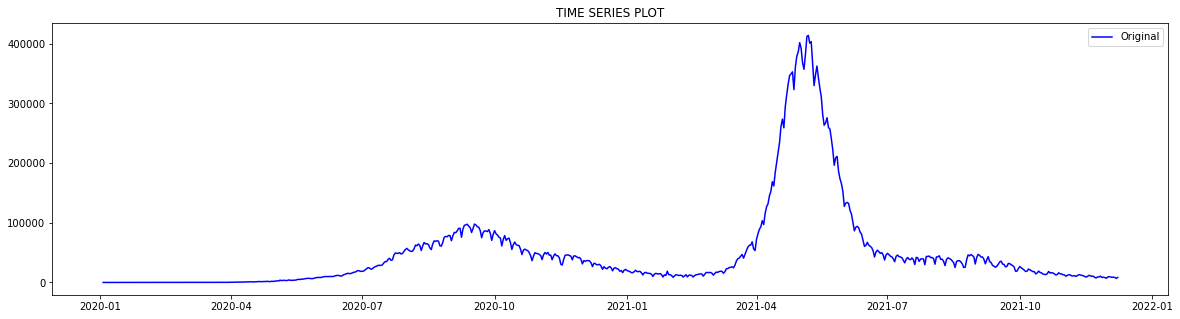



ADFULLER TEST RESULTS : 

Test Statistic                  -2.646656
p-value                          0.083733
#Lags Used                      20.000000
Number of Observations Used    685.000000
Critical Value (1%)             -3.439932
Critical Value (5%)             -2.865769
Critical Value (10%)            -2.569022
dtype: float64


In [26]:
test_stationarity(df_india.New_cases)

The p-Value from the Test Statistics is higher than 0.05, which indicates the data as Non-Stationary

#### NEW DEATHS

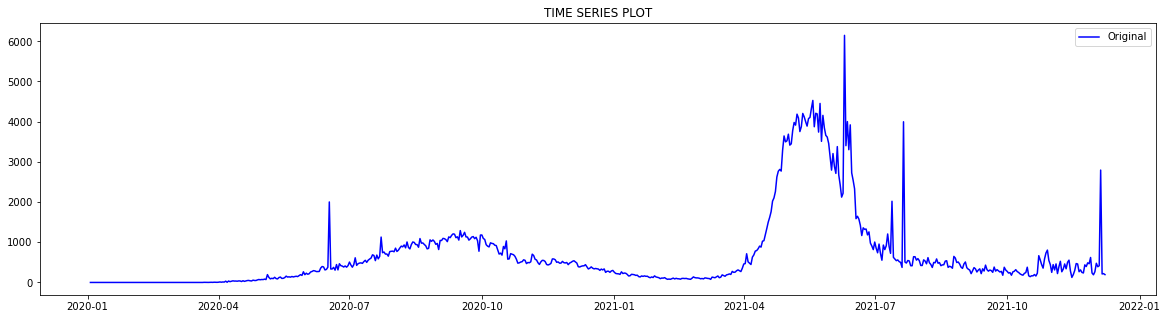



ADFULLER TEST RESULTS : 

Test Statistic                  -2.693232
p-value                          0.075217
#Lags Used                      18.000000
Number of Observations Used    687.000000
Critical Value (1%)             -3.439904
Critical Value (5%)             -2.865756
Critical Value (10%)            -2.569015
dtype: float64


In [27]:
test_stationarity(df_india.New_deaths)

The p-Value from the Test Statistics is higher than 0.05, which indicates the data as Non-Stationary

### STEP - 4 : STATIONARITY CONVERSION USING POWER TRANSFORMATION

#### NEW CASES

In [28]:
df_india_New_cases_log = np.log(df_india.New_cases)

Taking Log on the data

In [29]:
df_india_New_cases_log = df_india_New_cases_log.replace([np.inf, -np.inf], np.nan).dropna()

Droping rows with Nan and inf after transformation

In [30]:
df_india_New_cases_log = df_india_New_cases_log.asfreq('d')

In [31]:
df_india_New_cases_log.isnull().sum()

29

We got 29 rows of Nan values after stationarity conversion

In [32]:
df_india_New_cases_log = df_india_New_cases_log.fillna(method='ffill')

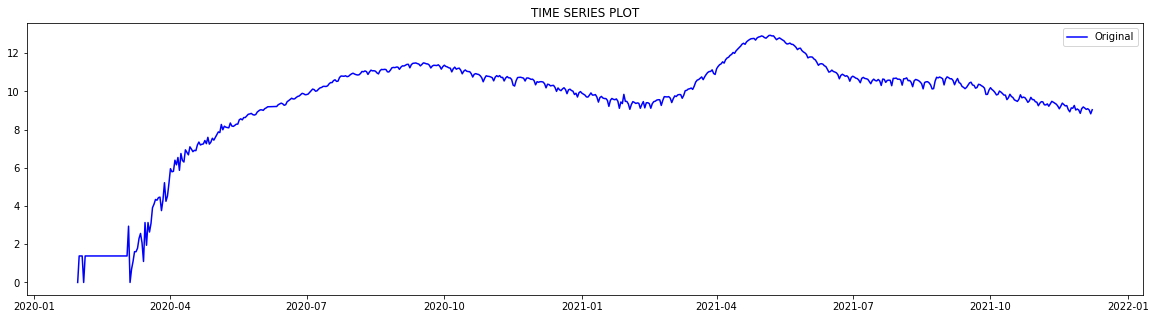



ADFULLER TEST RESULTS : 

Test Statistic                  -4.224777
p-value                          0.000598
#Lags Used                      20.000000
Number of Observations Used    658.000000
Critical Value (1%)             -3.440327
Critical Value (5%)             -2.865942
Critical Value (10%)            -2.569114
dtype: float64


In [33]:
test_stationarity(df_india_New_cases_log)

The p-Value from the Test Statistics is less than 0.05, which indicates the data is Stationary

#### NEW DEATHS

In [34]:
df_india_New_Death_log = np.log(df_india.New_deaths)

Taking Log on the data

In [35]:
df_india_New_Death_log = df_india_New_Death_log.replace([np.inf, -np.inf], np.nan).dropna()

Droping rows with Nan and inf after transformation

In [36]:
df_india_New_Death_log = df_india_New_Death_log.asfreq('d')

In [37]:
df_india_New_Death_log.isnull().sum()

6

We got 6 rows of Nan values after stationarity conversion

In [38]:
df_india_New_Death_log = df_india_New_Death_log.fillna(method='ffill')

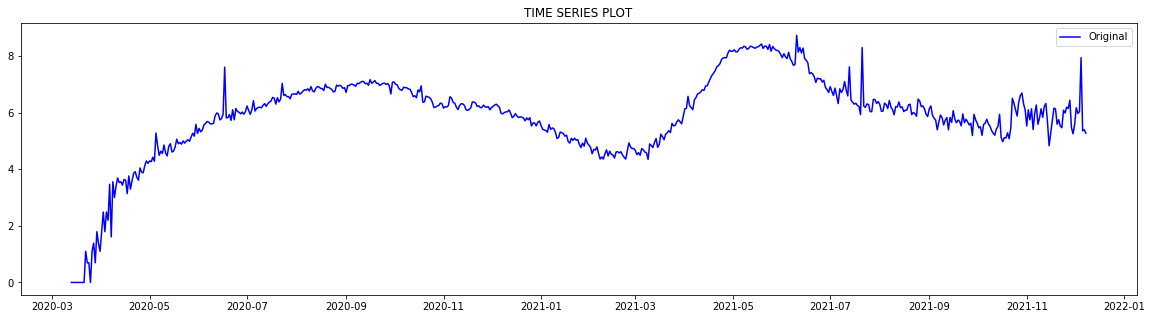



ADFULLER TEST RESULTS : 

Test Statistic                  -3.689671
p-value                          0.004261
#Lags Used                      18.000000
Number of Observations Used    617.000000
Critical Value (1%)             -3.440993
Critical Value (5%)             -2.866236
Critical Value (10%)            -2.569271
dtype: float64


In [39]:
test_stationarity(df_india_New_Death_log)

The p-Value from the Test Statistics is less than 0.05, which indicates the data is Stationary

## MODELING

### NEW CASES

### ACF & PACF PLOTS

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

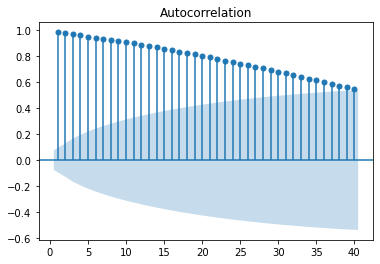

In [41]:
plot_acf(df_india_New_cases_log,lags=40,zero=False)
plt.show()

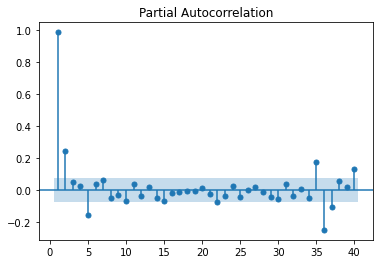

In [42]:
plot_pacf(df_india_New_cases_log,lags=40,zero=False)
plt.show()

### TRAIN - TEST SPLIT

In [43]:
new_cases_train = df_india_New_cases_log[:-15]
new_cases_test = df_india_New_cases_log[-15:]

### 1. ARIMA MODEL

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
arima_model_1 = ARIMA(new_cases_train,order=(1,0,1))
arima_model_1 = arima_model_1.fit()
arima_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  32.524
Date:                Wed, 02 Feb 2022   AIC                            -57.048
Time:                        13:40:34   BIC                            -39.055
Sample:                    01-30-2020   HQIC                           -50.076
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3697      4.413      1.217      0.224      -3.280      14.020
ar.L1          0.9996      0.001    811.004      0.000       0.997       1.002
ma.L1         -0.4528      0.016    -27.916      0.000      -0.485      -0.421
sigma2         0.0526      0.001     47.536      0.000       0.050       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):             17777.66
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

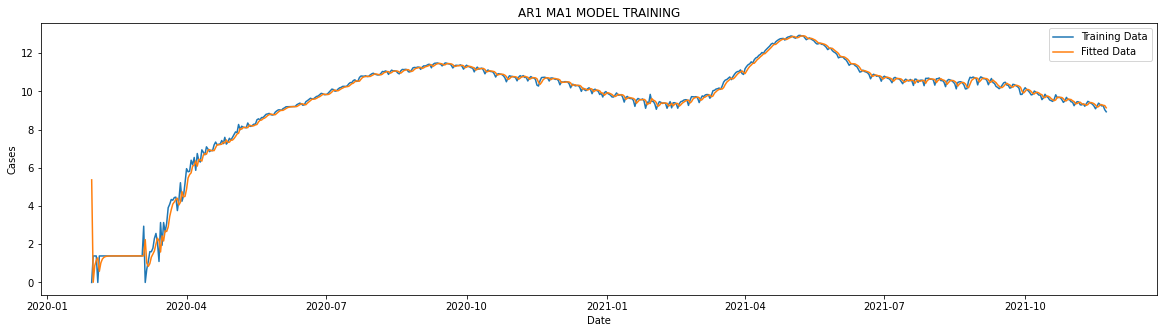

In [46]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_1.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

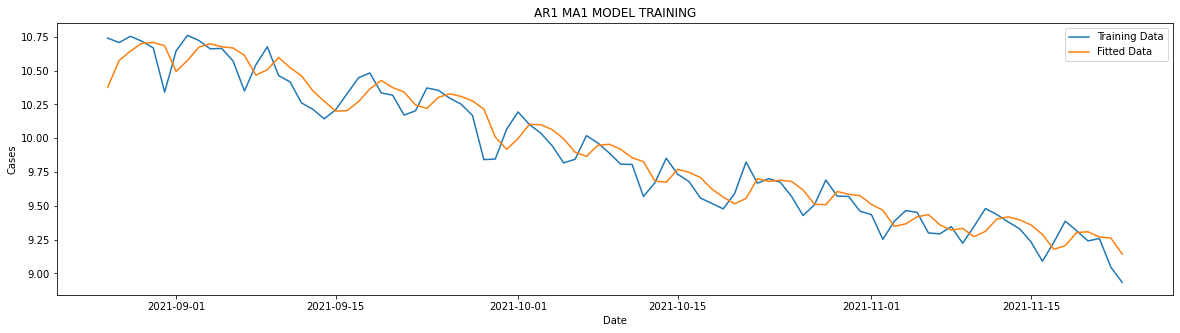

In [47]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_1.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

In [48]:
arima_prediction1 = arima_model_1.predict(start = '2021-11-24' ,end = '2021-12-08')

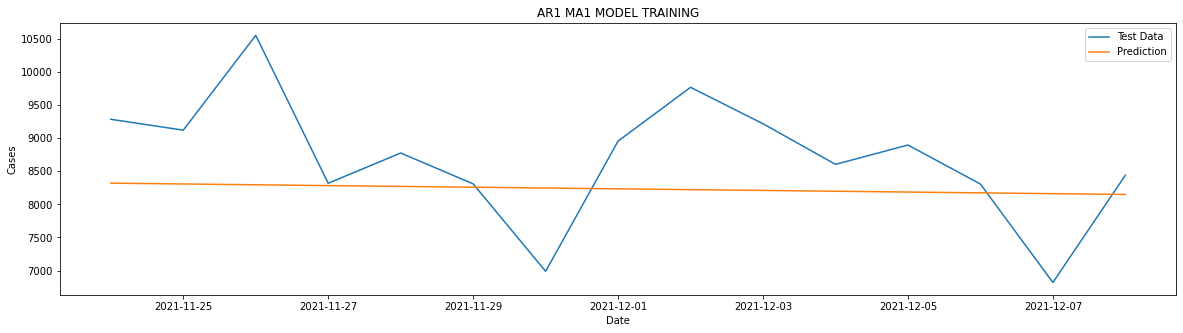

In [49]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction1))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mae_arima_1 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction1))
print('Mean Absolute Error  : ',mae_arima_1)

Mean Absolute Error  :  801.3163604380585


We can see that our model predicted a liner line with MAE of 801.316 as it is a AR 1 and MA 1 Model.


#### FITTING AR2 MA5 MODEL

In [52]:
arima_model_2 = ARIMA(new_cases_train,order=(2,0,5))
arima_model_2 = arima_model_2.fit()
arima_model_2.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                 ARIMA(2, 0, 5)   Log Likelihood                  53.818
Date:                Wed, 02 Feb 2022   AIC                            -89.637
Time:                        13:40:35   BIC                            -49.152
Sample:                    01-30-2020   HQIC                           -73.949
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7221      4.927      1.161      0.246      -3.935      15.380
ar.L1          0.1276      0.021      5.964      0.000       0.086       0.169
ar.L2          0.8717      0.021     41.044      0.000       0.830       0.913
ma.L1          0.3927      0.028     13.840      0.000       0.337       0.448
ma.L2         -0.4912      0.024    -20.887      0.000      -0.537      -0.445
ma.L3         -0.0721      0.021     -3.515      0.000      -0.112      -0.032
ma.L4          0.1098      0.022      5.101      0.000       0.068       0.152
ma.L5          0.2408      0.019     12.952      0.000       0.204       0.277
sigma2         0.0492      0.001     40.834      0.000       0.047       0.052
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13521.13
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

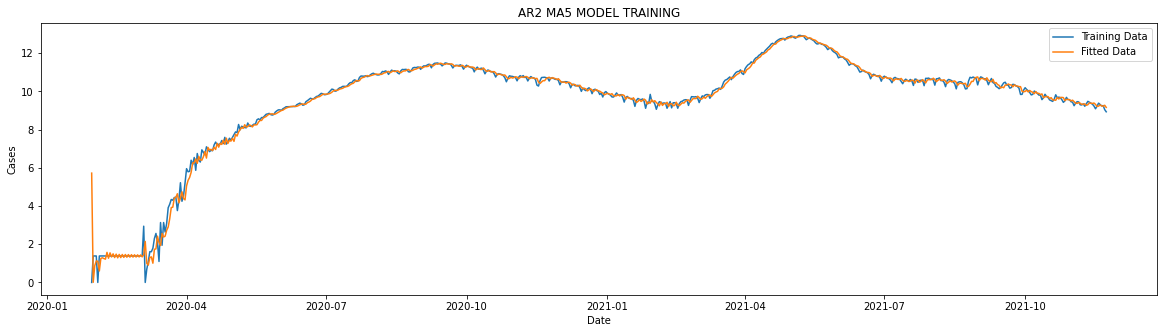

In [53]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_2.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

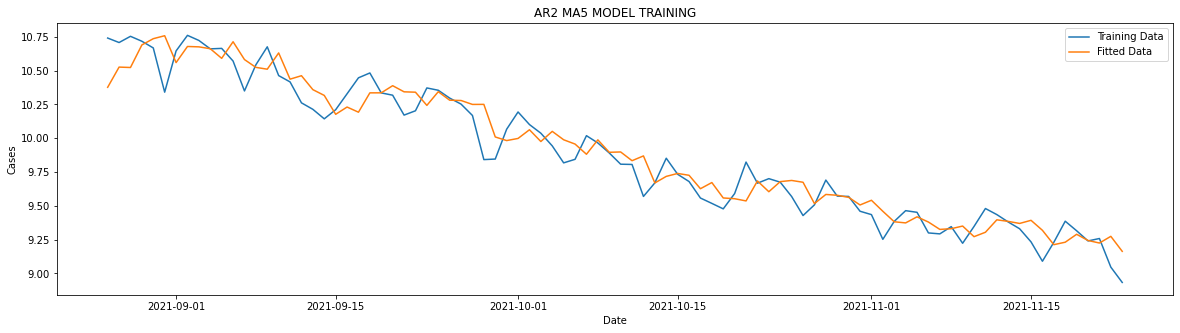

In [54]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_2.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

In [55]:
arima_prediction2 = arima_model_2.predict(start = '2021-11-24' ,end = '2021-12-08')

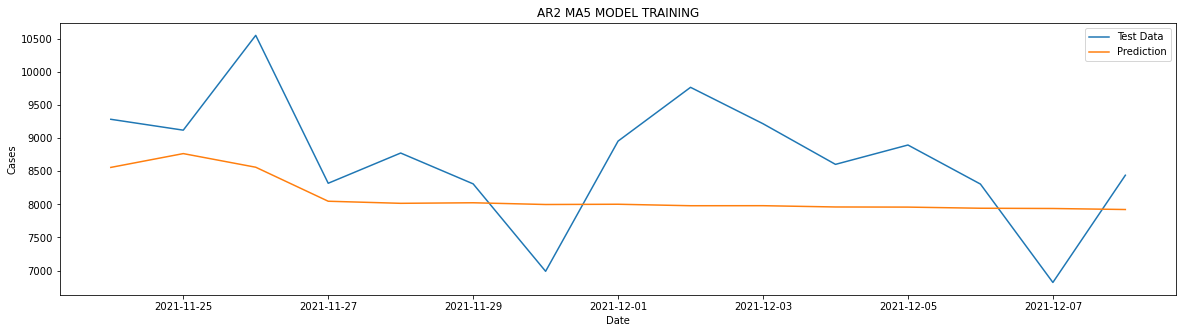

In [56]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction2))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

In [57]:
mae_arima_2 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction2))

print('Mean Absolute Error  : ',mae_arima_2)

Mean Absolute Error  :  862.78790664785


#### FITTING AR2 MA10 MODEL

In [58]:
arima_model_3 = ARIMA(new_cases_train[-90:],order=(2,0,10))
arima_model_3 = arima_model_3.fit()
arima_model_3.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                   90
Model:                ARIMA(2, 0, 10)   Log Likelihood                  80.454
Date:                Wed, 02 Feb 2022   AIC                           -132.907
Time:                        13:40:36   BIC                            -97.910
Sample:                    08-26-2021   HQIC                          -118.794
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8876      0.464     21.287      0.000       8.977      10.798
ar.L1          1.1149      0.588      1.895      0.058      -0.038       2.268
ar.L2         -0.1270      0.573     -0.222      0.825      -1.250       0.996
ma.L1         -0.1825      0.620     -0.294      0.769      -1.398       1.033
ma.L2         -0.1763      0.167     -1.052      0.293      -0.504       0.152
ma.L3         -0.0689      0.227     -0.304      0.761      -0.514       0.376
ma.L4          0.3260      0.129      2.536      0.011       0.074       0.578
ma.L5         -0.2414      0.251     -0.964      0.335      -0.732       0.250
ma.L6         -0.1207      0.184     -0.658      0.511      -0.481       0.239
ma.L7          0.6802      0.197      3.448      0.001       0.294       1.067
ma.L8          0.0177      0.464      0.038      0.969      -0.891       0.927
ma.L9         -0.1826      0.156     -1.170      0.242      -0.488       0.123
ma.L10        -0.2234      0.200     -1.118      0.263      -0.615       0.168
sigma2         0.0087      0.002      5.636      0.000       0.006       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.65   Prob(JB):                         0.94
Heteroskedasticity (H):               0.57   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

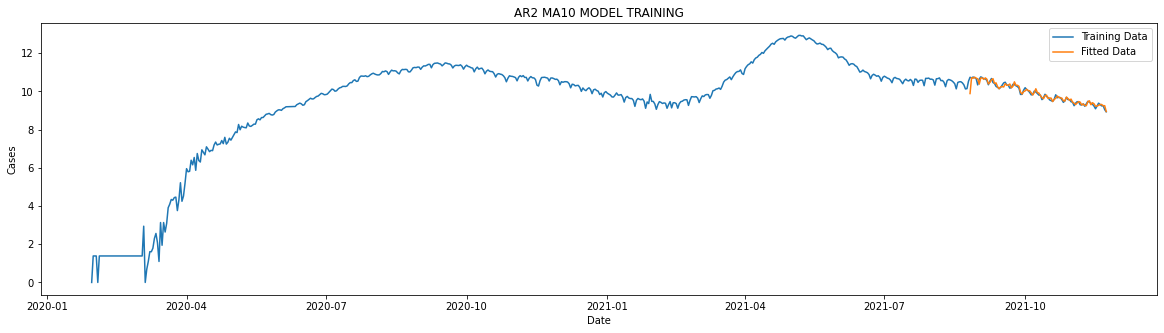

In [59]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_3.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

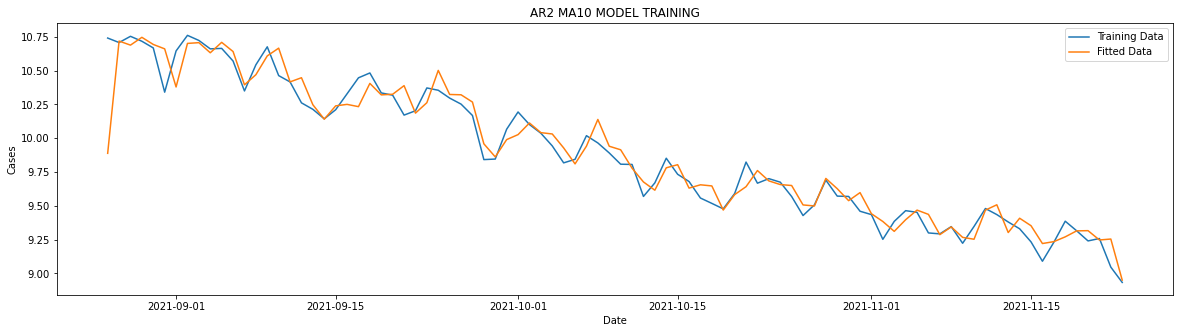

In [60]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_3.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

In [61]:
arima_prediction3 = arima_model_3.predict(start = '2021-11-24' ,end = '2021-12-08')

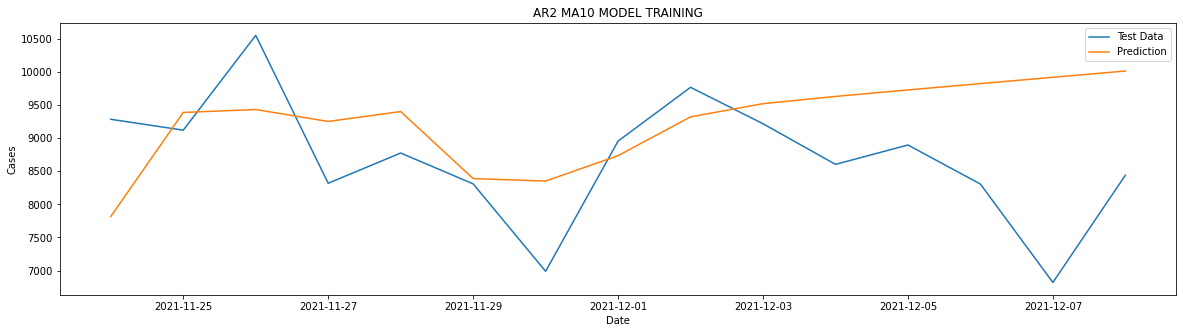

In [62]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction3))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

In [63]:
mae_arima_3 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction3))
print('Mean Absolute Error  : ',mae_arima_3)

Mean Absolute Error  :  990.3597821849578


#### FITTING AR2 MA20 MODEL

In [64]:
arima_model_4 = ARIMA(new_cases_train,order=(2,0,20))
arima_model_4 = arima_model_4.fit()
arima_model_4.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                ARIMA(2, 0, 20)   Log Likelihood                 131.973
Date:                Wed, 02 Feb 2022   AIC                           -215.946
Time:                        13:40:43   BIC                           -107.987
Sample:                    01-30-2020   HQIC                          -174.112
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1673      5.809      1.578      0.115      -2.217      20.552
ar.L1          0.2115      0.659      0.321      0.748      -1.080       1.503
ar.L2          0.7853      0.658      1.194      0.232      -0.504       2.074
ma.L1          0.1959      0.653      0.300      0.764      -1.084       1.476
ma.L2         -0.4891      0.393     -1.243      0.214      -1.260       0.282
ma.L3         -0.0317      0.033     -0.969      0.333      -0.096       0.032
ma.L4          0.1434      0.027      5.336      0.000       0.091       0.196
ma.L5          0.1157      0.095      1.221      0.222      -0.070       0.301
ma.L6         -0.1852      0.027     -6.912      0.000      -0.238      -0.133
ma.L7          0.1961      0.117      1.674      0.094      -0.033       0.426
ma.L8          0.3722      0.228      1.633      0.102      -0.074       0.819
ma.L9         -0.0603      0.061     -0.982      0.326      -0.181       0.060
ma.L10        -0.4362      0.098     -4.461      0.000      -0.628      -0.245
ma.L11         0.2532      0.202      1.251      0.211      -0.144       0.650
ma.L12         0.3227      0.335      0.962      0.336      -0.335       0.980
ma.L13        -0.0103      0.066     -0.157      0.875      -0.139       0.118
ma.L14         0.0860      0.051      1.695      0.090      -0.013       0.185
ma.L15         0.1527      0.054      2.830      0.005       0.047       0.258
ma.L16        -0.0728      0.085     -0.861      0.389      -0.239       0.093
ma.L17        -0.2219      0.105     -2.103      0.035      -0.429      -0.015
ma.L18         0.1124      0.080      1.413      0.158      -0.043       0.268
ma.L19         0.2681      0.139      1.927      0.054      -0.005       0.541
ma.L20         0.1146      0.078      1.464      0.143      -0.039       0.268
sigma2         0.0389      0.001     35.952      0.000       0.037       0.041
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             22741.08
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

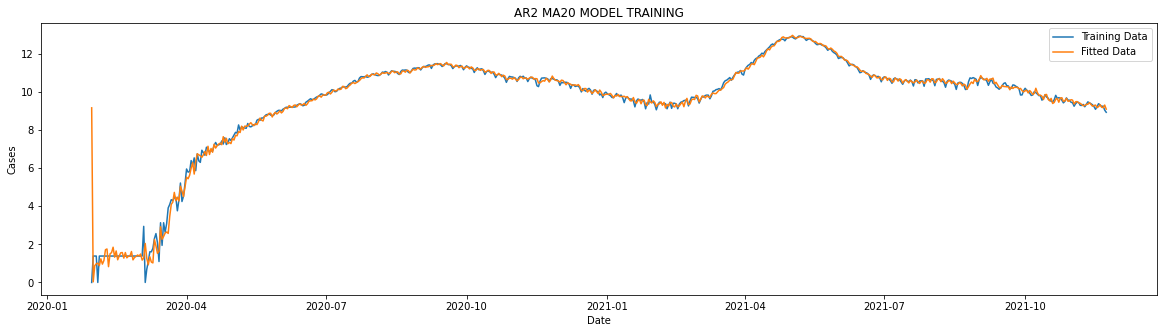

In [65]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_4.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

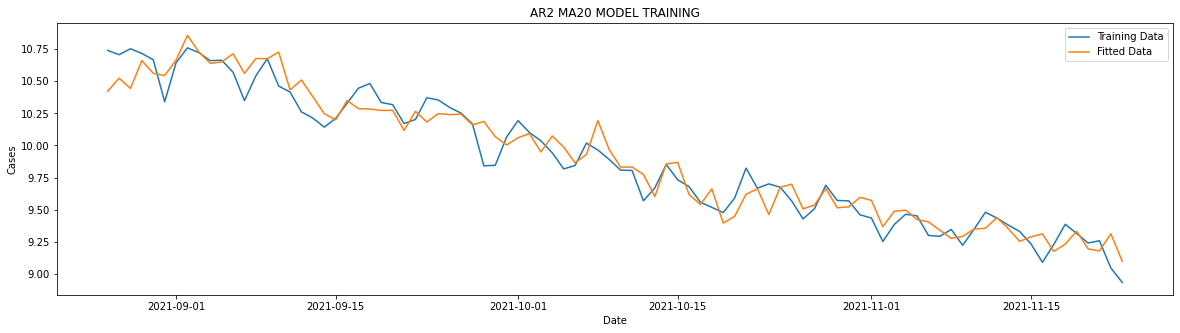

In [66]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_4.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

In [67]:
arima_prediction4 = arima_model_4.predict(start = '2021-11-24' ,end = '2021-12-08')

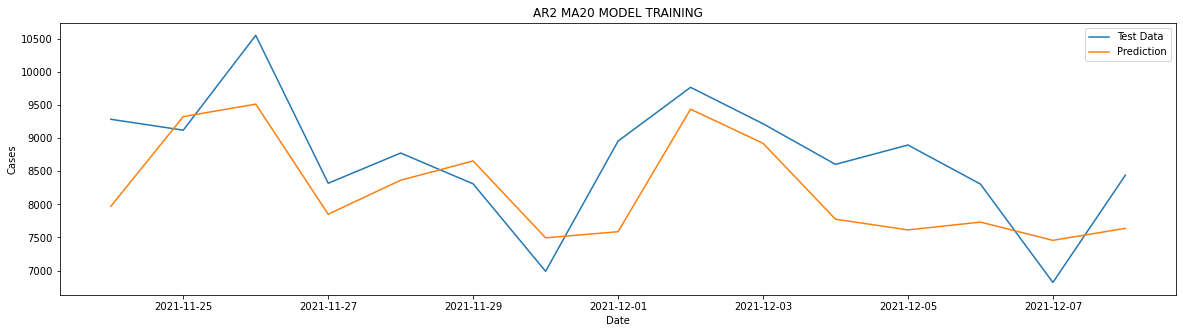

In [68]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction4))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

In [69]:
mae_arima_4 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction4))
print('Mean Absolute Error  : ',mae_arima_4)

Mean Absolute Error  :  692.7523687582851


#### FITTING AR2 MA25 MODEL

In [70]:
arima_model_5 = ARIMA(new_cases_train,order=(2,0,25))
arima_model_5 = arima_model_5.fit()
arima_model_5.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                ARIMA(2, 0, 25)   Log Likelihood                 148.379
Date:                Wed, 02 Feb 2022   AIC                           -238.759
Time:                        13:40:53   BIC                           -108.309
Sample:                    01-30-2020   HQIC                          -188.210
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3719      2.618      3.579      0.000       4.240      14.504
ar.L1          0.6043      0.189      3.199      0.001       0.234       0.974
ar.L2          0.3880      0.188      2.067      0.039       0.020       0.756
ma.L1         -0.1748      0.191     -0.914      0.361      -0.549       0.200
ma.L2         -0.1846      0.106     -1.739      0.082      -0.393       0.023
ma.L3         -0.0237      0.038     -0.624      0.533      -0.098       0.051
ma.L4          0.0639      0.028      2.246      0.025       0.008       0.120
ma.L5          0.0875      0.039      2.259      0.024       0.012       0.163
ma.L6         -0.1136      0.037     -3.072      0.002      -0.186      -0.041
ma.L7          0.2175      0.044      4.978      0.000       0.132       0.303
ma.L8          0.2533      0.064      3.936      0.000       0.127       0.379
ma.L9         -0.1132      0.041     -2.763      0.006      -0.193      -0.033
ma.L10        -0.1721      0.049     -3.517      0.000      -0.268      -0.076
ma.L11         0.1610      0.043      3.772      0.000       0.077       0.245
ma.L12         0.0797      0.043      1.842      0.065      -0.005       0.164
ma.L13         0.3714      0.037      9.957      0.000       0.298       0.444
ma.L14         0.0020      0.078      0.025      0.980      -0.151       0.155
ma.L15        -0.0014      0.045     -0.032      0.975      -0.090       0.087
ma.L16        -0.1118      0.033     -3.338      0.001      -0.177      -0.046
ma.L17         0.0706      0.045      1.582      0.114      -0.017       0.158
ma.L18         0.0013      0.043      0.030      0.976      -0.082       0.085
ma.L19         0.1070      0.033      3.248      0.001       0.042       0.172
ma.L20         0.0369      0.044      0.844      0.399      -0.049       0.123
ma.L21         0.3394      0.037      9.095      0.000       0.266       0.413
ma.L22        -0.0559      0.067     -0.831      0.406      -0.188       0.076
ma.L23        -0.2885      0.040     -7.264      0.000      -0.366      -0.211
ma.L24         0.3366      0.058      5.829      0.000       0.223       0.450
ma.L25        -0.0027      0.079     -0.035      0.972      -0.157       0.152
sigma2         0.0363      0.001     25.184      0.000       0.034       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):             11593.69
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

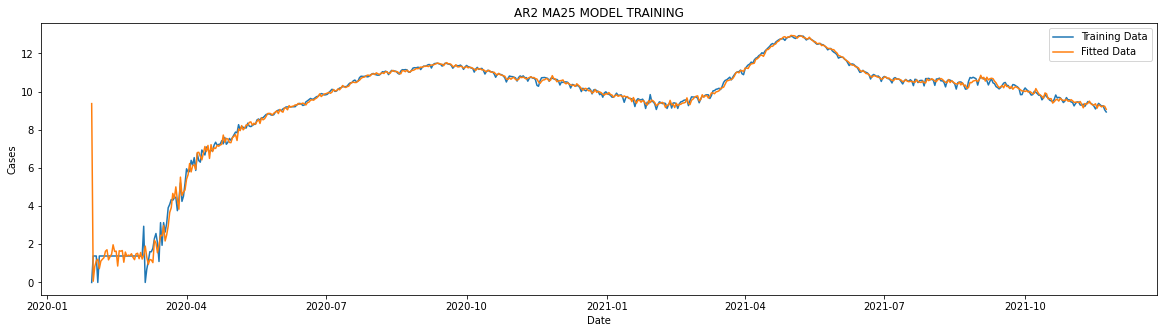

In [71]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_5.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

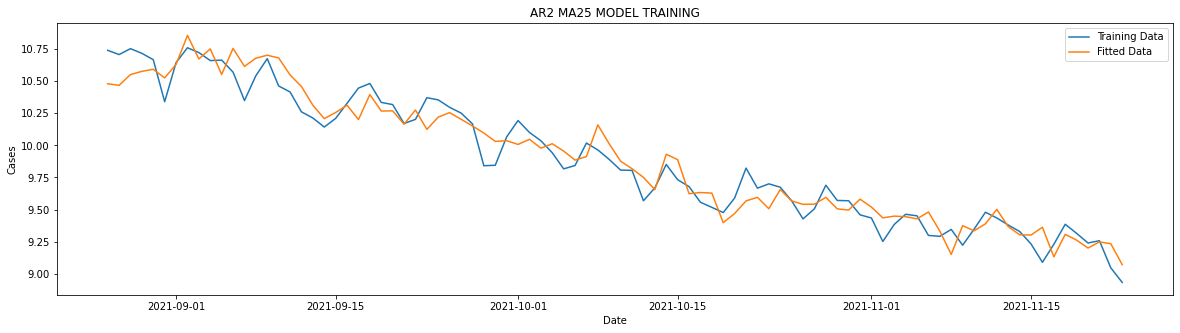

In [72]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_5.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

In [73]:
arima_prediction5 = arima_model_5.predict(start = '2021-11-24' ,end = '2021-12-08')

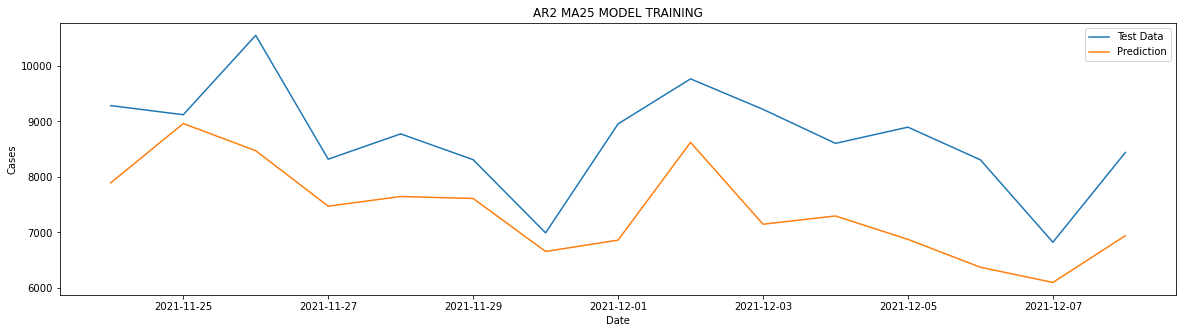

In [74]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction5))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

In [75]:
mae_arima_5 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction5))
print('Mean Absolute Error  : ',mae_arima_5)

Mean Absolute Error  :  1295.5751246933683


#### FITTING AR2 MA30 MODEL

In [76]:
arima_model_6 = ARIMA(new_cases_train,order=(2,0,30))
arima_model_6 = arima_model_6.fit()
arima_model_6.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                ARIMA(2, 0, 30)   Log Likelihood                 164.089
Date:                Wed, 02 Feb 2022   AIC                           -260.179
Time:                        13:41:08   BIC                           -107.237
Sample:                    01-30-2020   HQIC                          -200.914
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4270      3.167      2.977      0.003       3.220      15.635
ar.L1          0.7568      0.164      4.604      0.000       0.435       1.079
ar.L2          0.2357      0.164      1.436      0.151      -0.086       0.557
ma.L1         -0.3538      0.171     -2.067      0.039      -0.689      -0.018
ma.L2         -0.0927      0.102     -0.907      0.365      -0.293       0.108
ma.L3         -0.0401      0.054     -0.746      0.456      -0.146       0.065
ma.L4          0.1476      0.043      3.423      0.001       0.063       0.232
ma.L5         -0.0645      0.047     -1.367      0.172      -0.157       0.028
ma.L6         -0.0575      0.053     -1.080      0.280      -0.162       0.047
ma.L7          0.2542      0.044      5.839      0.000       0.169       0.340
ma.L8          0.1951      0.061      3.186      0.001       0.075       0.315
ma.L9         -0.0450      0.043     -1.045      0.296      -0.129       0.039
ma.L10        -0.1110      0.045     -2.442      0.015      -0.200      -0.022
ma.L11         0.1823      0.052      3.512      0.000       0.081       0.284
ma.L12        -0.0539      0.046     -1.176      0.240      -0.144       0.036
ma.L13         0.3522      0.047      7.464      0.000       0.260       0.445
ma.L14        -0.0800      0.067     -1.190      0.234      -0.212       0.052
ma.L15         0.1356      0.050      2.701      0.007       0.037       0.234
ma.L16        -0.0983      0.048     -2.042      0.041      -0.193      -0.004
ma.L17         0.1669      0.048      3.455      0.001       0.072       0.262
ma.L18        -0.0948      0.048     -1.985      0.047      -0.188      -0.001
ma.L19         0.1152      0.050      2.295      0.022       0.017       0.214
ma.L20         0.0382      0.053      0.726      0.468      -0.065       0.141
ma.L21         0.4256      0.048      8.794      0.000       0.331       0.520
ma.L22        -0.0581      0.079     -0.738      0.461      -0.212       0.096
ma.L23        -0.1275      0.046     -2.775      0.006      -0.218      -0.037
ma.L24         0.3242      0.048      6.710      0.000       0.229       0.419
ma.L25        -0.1243      0.068     -1.828      0.068      -0.258       0.009
ma.L26        -0.0906      0.046     -1.967      0.049      -0.181      -0.000
ma.L27         0.0032      0.037      0.086      0.931      -0.069       0.076
ma.L28         0.2593      0.035      7.356      0.000       0.190       0.328
ma.L29        -0.0612      0.050     -1.213      0.225      -0.160       0.038
ma.L30         0.1774      0.037      4.861      0.000       0.106       0.249
sigma2         0.0342      0.002     19.879      0.000       0.031       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             12625.62
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                

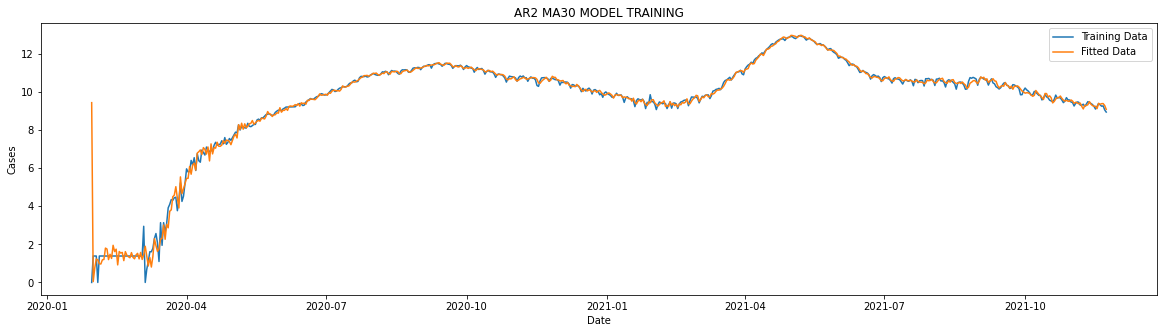

In [77]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_6.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

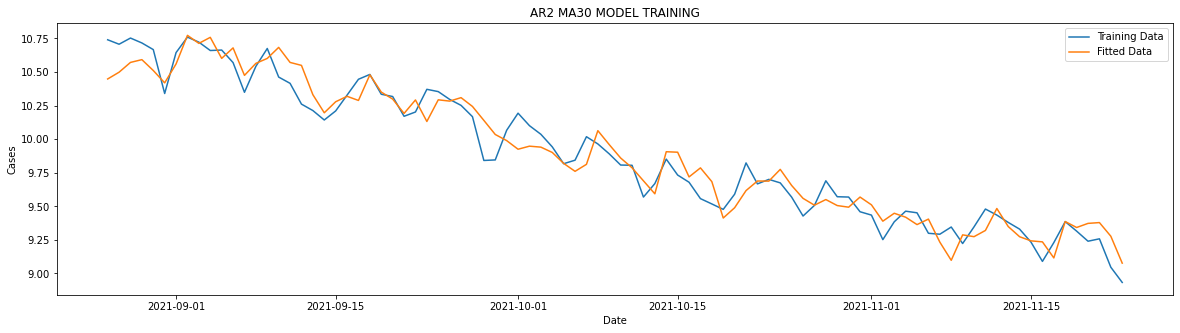

In [78]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_6.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

In [79]:
arima_prediction6 = arima_model_6.predict(start = '2021-11-24' ,end = '2021-12-08')

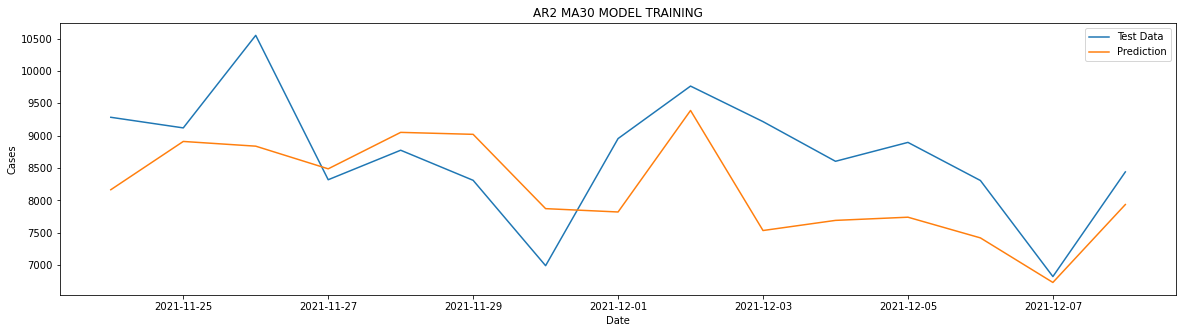

In [80]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction6))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

In [81]:
mae_arima_6 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction6))
print('Mean Absolute Error  : ',mae_arima_6)

Mean Absolute Error  :  788.1245760610992


#### FITTING AR5 MA40 MODEL

In [82]:
arima_model_7 = ARIMA(new_cases_train,order=(5,0,40))
arima_model_7 = arima_model_7.fit()
arima_model_7.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                ARIMA(5, 0, 40)   Log Likelihood                 185.436
Date:                Wed, 02 Feb 2022   AIC                           -276.871
Time:                        13:41:52   BIC                            -65.452
Sample:                    01-30-2020   HQIC                          -194.947
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4547      5.964      1.585      0.113      -2.235      21.144
ar.L1          0.4830      8.927      0.054      0.957     -17.013      17.979
ar.L2          0.0374      5.774      0.006      0.995     -11.279      11.354
ar.L3          0.0491      0.477      0.103      0.918      -0.886       0.984
ar.L4          0.3476      0.436      0.797      0.425      -0.507       1.202
ar.L5          0.0754      3.136      0.024      0.981      -6.070       6.221
ma.L1         -0.0458      8.927     -0.005      0.996     -17.543      17.451
ma.L2          0.2049      1.882      0.109      0.913      -3.483       3.893
ma.L3          0.1255      1.947      0.064      0.949      -3.690       3.941
ma.L4         -0.0569      0.866     -0.066      0.948      -1.755       1.641
ma.L5         -0.0028      0.775     -0.004      0.997      -1.522       1.517
ma.L6         -0.0559      0.205     -0.273      0.785      -0.457       0.345
ma.L7          0.2623      0.541      0.485      0.628      -0.798       1.322
ma.L8          0.2269      2.423      0.094      0.925      -4.523       4.976
ma.L9          0.0652      1.628      0.040      0.968      -3.125       3.256
ma.L10         0.0114      0.298      0.038      0.970      -0.573       0.596
ma.L11         0.2332      0.081      2.883      0.004       0.075       0.392
ma.L12        -0.0309      2.045     -0.015      0.988      -4.038       3.977
ma.L13         0.3204      0.599      0.535      0.593      -0.854       1.494
ma.L14         0.1442      2.933      0.049      0.961      -5.605       5.893
ma.L15         0.2594      0.841      0.309      0.758      -1.388       1.907
ma.L16        -0.0318      2.090     -0.015      0.988      -4.128       4.065
ma.L17         0.0913      0.642      0.142      0.887      -1.166       1.349
ma.L18         0.0672      0.851      0.079      0.937      -1.600       1.735
ma.L19         0.1013      0.509      0.199      0.842      -0.897       1.100
ma.L20         0.0956      0.793      0.121      0.904      -1.459       1.650
ma.L21         0.4192      0.755      0.555      0.579      -1.060       1.899
ma.L22         0.2054      3.596      0.057      0.954      -6.842       7.253
ma.L23        -0.0319      1.244     -0.026      0.980      -2.471       2.407
ma.L24         0.3531      0.564      0.626      0.531      -0.752       1.458
ma.L25        -0.1082      3.220     -0.034      0.973      -6.419       6.202
ma.L26         0.0479      1.527      0.031      0.975      -2.944       3.040
ma.L27         0.0728      0.658      0.111      0.912      -1.217       1.362
ma.L28         0.2333      0.597      0.391      0.696      -0.936       1.402
ma.L29        -0.0458      1.940     -0.024      0.981      -3.848       3.756
ma.L30         0.1658      0.695      0.238      0.812      -1.197       1.529
ma.L31         0.0934      1.538      0.061      0.952      -2.921       3.108
ma.L32         0.0361      0.596      0.061      0.952      -1.132       1.204
ma

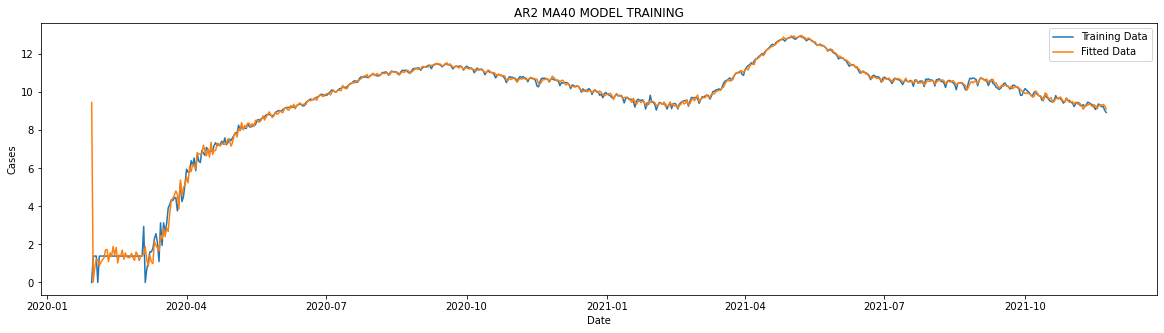

In [83]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_7.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

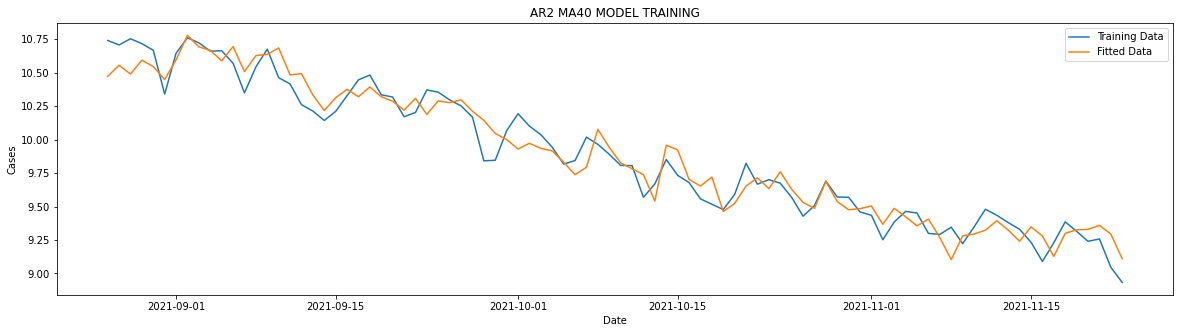

In [84]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_7.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

In [85]:
arima_prediction7 = arima_model_7.predict(start = '2021-11-24' ,end = '2021-12-08')

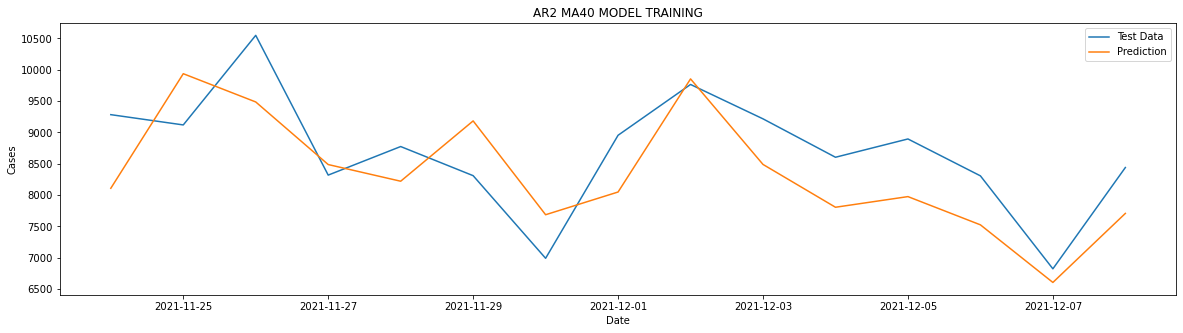

In [86]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction7))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

In [87]:
mae_arima_7 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction7))
print('Mean Absolute Error  : ',mae_arima_7)

Mean Absolute Error  :  701.4003094625405


#### FITTING AR5 MA20 MODEL

In [88]:
arima_model_8 = ARIMA(new_cases_train,order=(5,0,20))
arima_model_8 = arima_model_8.fit()
arima_model_8.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  664
Model:                ARIMA(5, 0, 20)   Log Likelihood                 143.416
Date:                Wed, 02 Feb 2022   AIC                           -232.831
Time:                        13:41:59   BIC                           -111.378
Sample:                    01-30-2020   HQIC                          -185.768
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3676      3.046      3.076      0.002       3.398      15.337
ar.L1          1.1024      0.087     12.633      0.000       0.931       1.273
ar.L2         -0.9991      0.138     -7.246      0.000      -1.269      -0.729
ar.L3          1.1047      0.123      8.995      0.000       0.864       1.345
ar.L4         -0.3332      0.134     -2.487      0.013      -0.596      -0.071
ar.L5          0.1189      0.086      1.382      0.167      -0.050       0.288
ma.L1         -0.6992      0.084     -8.280      0.000      -0.865      -0.534
ma.L2          1.0028      0.108      9.246      0.000       0.790       1.215
ma.L3         -0.7954      0.109     -7.294      0.000      -1.009      -0.582
ma.L4          0.4009      0.122      3.285      0.001       0.162       0.640
ma.L5         -0.1364      0.074     -1.843      0.065      -0.281       0.009
ma.L6          0.0029      0.051      0.056      0.955      -0.098       0.104
ma.L7          0.3062      0.049      6.302      0.000       0.211       0.401
ma.L8         -0.0663      0.051     -1.290      0.197      -0.167       0.034
ma.L9          0.2476      0.053      4.674      0.000       0.144       0.351
ma.L10        -0.3079      0.051     -6.085      0.000      -0.407      -0.209
ma.L11         0.3988      0.054      7.439      0.000       0.294       0.504
ma.L12        -0.3858      0.061     -6.327      0.000      -0.505      -0.266
ma.L13         0.6329      0.062     10.127      0.000       0.510       0.755
ma.L14        -0.2211      0.077     -2.884      0.004      -0.371      -0.071
ma.L15         0.2291      0.066      3.452      0.001       0.099       0.359
ma.L16        -0.1321      0.051     -2.583      0.010      -0.232      -0.032
ma.L17         0.0288      0.052      0.551      0.582      -0.074       0.131
ma.L18         0.0611      0.043      1.420      0.156      -0.023       0.145
ma.L19        -0.0746      0.036     -2.067      0.039      -0.145      -0.004
ma.L20         0.3198      0.035      9.191      0.000       0.252       0.388
sigma2         0.0371      0.001     27.618      0.000       0.034       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             17355.96
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

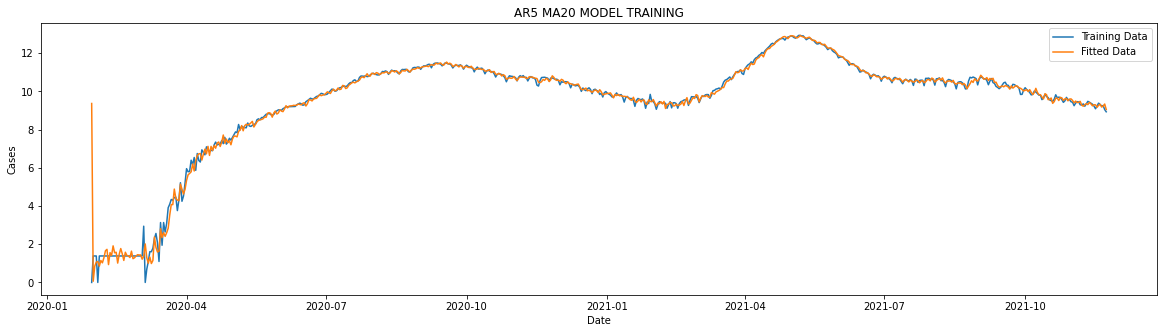

In [89]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train)
plt.plot(arima_model_8.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

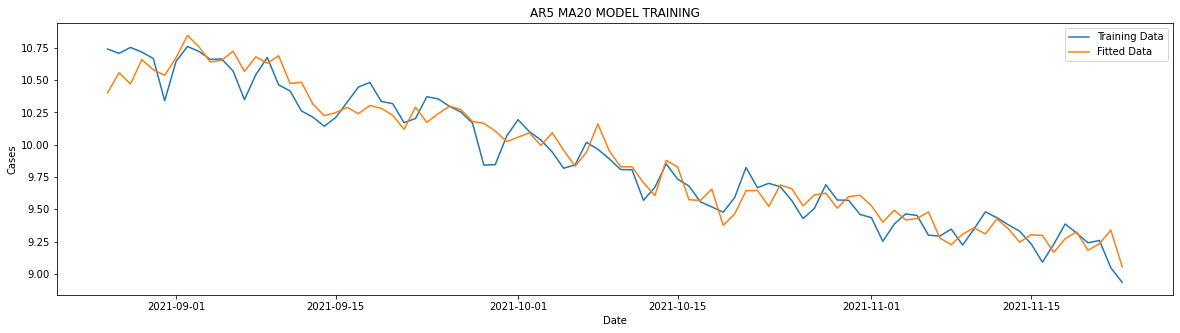

In [90]:
plt.figure(figsize=(20,5))
plt.plot(new_cases_train[-90:])
plt.plot(arima_model_8.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

In [91]:
arima_prediction8 = arima_model_8.predict(start = '2021-11-24' ,end = '2021-12-08')

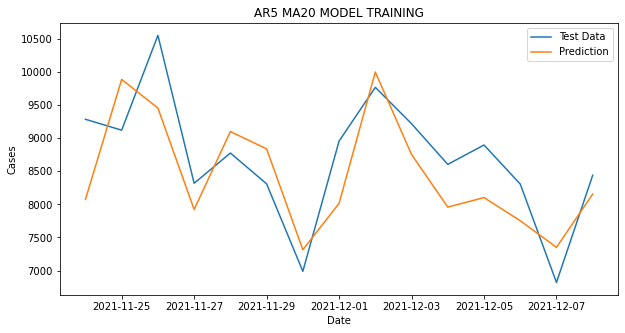

In [92]:
plt.figure(figsize=(10,5))
plt.plot(np.exp(new_cases_test))
plt.plot(np.exp(arima_prediction8))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

In [93]:
mae_arima_8 = mean_absolute_error(np.exp(new_cases_test),np.exp(arima_prediction8))
print('Mean Absolute Error  : ',mae_arima_8)

Mean Absolute Error  :  605.3583321189469


### 2. AUTO ARIMA

In [94]:
from pmdarima.arima import auto_arima

In [95]:
auto_arima_model = auto_arima(new_cases_train)

exogenous -> outside factors (e.g other time series)

m -> seasonal cycle length

max_order -> maximum amount of variables to be used in the regression (p + q)

max_p -> maximum AR components

max_q -> maximum MA components

max_d -> maximum Integrations

maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)

alpha -> level of significance, default is 5%, which we should be using most of the time

n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")

trend -> "ct" usually

Information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
(Akaike Information Criterion, Corrected Akaike Information Criterion,Bayesian Information Criterion, Hannan-Quinn Information Criterion, or "out of bag"--for validation scoring--respectively)

out_of_smaple -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

In [96]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  664
Model:               SARIMAX(3, 2, 5)   Log Likelihood                  99.739
Date:                Wed, 02 Feb 2022   AIC                           -181.477
Time:                        13:42:11   BIC                           -141.020
Sample:                             0   HQIC                          -165.798
                                - 664                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5277      0.022    -68.941      0.000      -1.571      -1.484
ar.L2         -1.3990      0.027    -52.542      0.000      -1.451      -1.347
ar.L3         -0.7803      0.021    -36.980      0.000      -0.822      -0.739
ma.L1          0.0050      0.023      0.216      0.829      -0.040       0.051
ma.L2         -0.5012      0.025    -20.322      0.000      -0.550      -0.453
ma.L3         -0.6481      0.021    -30.279      0.000      -0.690      -0.606
ma.L4         -0.3391      0.023    -14.434      0.000      -0.385      -0.293
ma.L5          0.7300      0.025     29.160      0.000       0.681       0.779
sigma2         0.0428      0.001     39.473      0.000       0.041       0.045
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             19654.67
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
auto_arima_prediction = auto_arima_model.predict(n_periods=15)

In [98]:
np.exp(auto_arima_prediction)

array([7948.92236745, 8970.27231685, 8779.52430554, 7533.63285896,
       7785.35137779, 8135.31893861, 7140.47527078, 6967.07036483,
       7317.1837277 , 6785.52727463, 6321.3178767 , 6571.66153207,
       6326.4011598 , 5853.86029746, 5882.07356581])

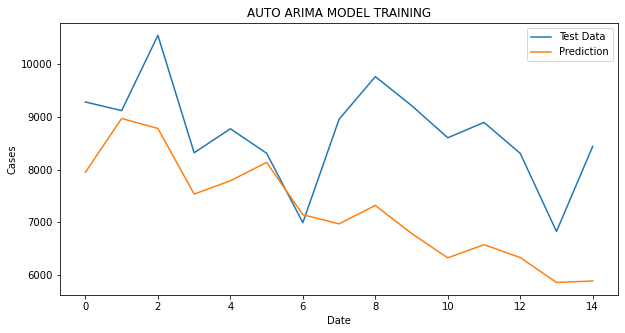

In [99]:
plt.figure(figsize=(10,5))
plt.plot(range(len(new_cases_test)),np.exp(new_cases_test))
plt.plot(range(len(new_cases_test)),np.exp(auto_arima_prediction))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AUTO ARIMA MODEL TRAINING')
plt.show()

In [100]:
auto_arima_mae = mean_absolute_error(np.exp(new_cases_test),np.exp(auto_arima_prediction))
print('Mean Absolute Error  : ',auto_arima_mae)

Mean Absolute Error  :  1488.2904871043909


### 3. FACEBOOK PROPHET

In [101]:
from fbprophet import Prophet

In [102]:
prophet_df = pd.read_csv('WHO-COVID-19-global-data.csv')
prophet_df = prophet_df[prophet_df['Country']=='India'].reset_index()

In [103]:
prophet_NewCase = prophet_df.drop(['index','Country_code','Country','WHO_region','Cumulative_cases','New_deaths','Cumulative_deaths'],axis=1)
prophet_NewDeath = prophet_df.drop(['index','Country_code','Country','WHO_region','New_cases','Cumulative_cases','Cumulative_deaths'],axis=1)

In [104]:
prophet_NewCase.rename({'Date_reported':'ds','New_cases':'y'},axis=1,inplace=True)
prophet_NewDeath.rename({'Date_reported':'ds','New_deaths':'y'},axis=1,inplace=True)

In [105]:
prophet_NewCase.head()

ds  y
0  2020-01-03  0
1  2020-01-04  0
2  2020-01-05  0
3  2020-01-06  0
4  2020-01-07  0

In [106]:
prophet_NewDeath.head()

ds  y
0  2020-01-03  0
1  2020-01-04  0
2  2020-01-05  0
3  2020-01-06  0
4  2020-01-07  0

In [107]:
prophet_NewCase_train = prophet_NewCase[:-15]
prophet_NewCase_test = prophet_NewCase[-15:]

prophet_NewDeath_train = prophet_NewDeath[:-15]
prophet_NewDeath_test = prophet_NewDeath[-15:]

In [108]:
prophet_model = Prophet()
prophet_model.fit(prophet_NewCase_train)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
future_new_case = prophet_model.make_future_dataframe(periods=15, freq='D')

In [110]:
forecast_new_case = prophet_model.predict(future_new_case)

In [111]:
forecast_new_case.tail()

ds         trend     yhat_lower    yhat_upper   trend_lower  \
701 2021-12-04 -33553.272412 -103604.803266  38781.164079 -33730.996492   
702 2021-12-05 -34462.491661 -106221.244684  40456.644700 -34710.871357   
703 2021-12-06 -35371.710909 -106919.247094  41300.422367 -35685.245179   
704 2021-12-07 -36280.930158 -111071.626369  37316.045527 -36664.277447   
705 2021-12-08 -37190.149406 -106331.328472  29974.376307 -37679.459175   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
701 -33368.107260     1943.192162           1943.192162           1943.192162   
702 -34224.667499     1591.965173           1591.965173           1591.965173   
703 -35021.619862     -721.284586           -721.284586           -721.284586   
704 -35853.497670    -6087.057385          -6087.057385          -6087.057385   
705 -36675.746008    -1162.080073          -1162.080073          -1162.080073   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
701  1943.192162   1943.192162   1943.192162                   0.0   
702  1591.965173   1591.965173   1591.965173                   0.0   
703  -721.284586   -721.284586   -721.284586                   0.0   
704 -6087.057385  -6087.057385  -6087.057385                   0.0   
705 -1162.080073  -1162.080073  -1162.080073                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
701                         0.0                         0.0 -31610.080250  
702                         0.0                         0.0 -32870.526488  
703                         0.0                         0.0 -36092.995495  
704                         0.0                         0.0 -42367.987543  
705                         0.0                         0.0 -38352.229479

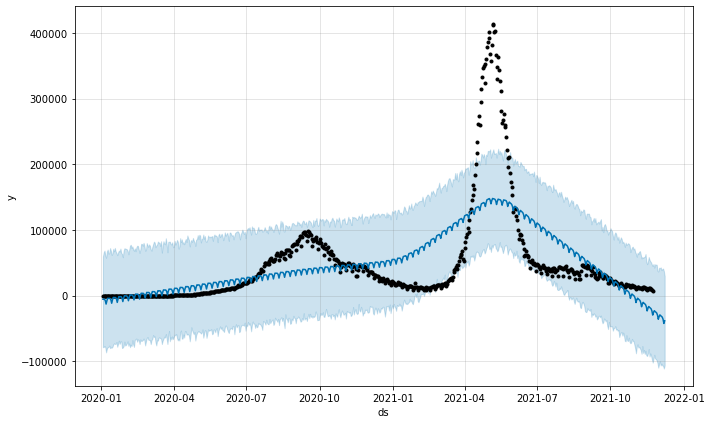

In [112]:
prophet_model.plot(forecast_new_case)
plt.show()

In [113]:
prophet_new_case_mae = mean_absolute_error(prophet_NewCase_test.y,forecast_new_case.yhat[-15:])
print('Mean Absolute Error  : ',prophet_new_case_mae)

Mean Absolute Error  :  39592.5533380884


### Our Model performance is very Poor as Prophet is more robust to the Outlier

#### FITTING PROPHET WITH LESS TRAINING SET

In [114]:
prophet_model_1 = Prophet()
prophet_model_1.fit(prophet_NewCase_train[-120:])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [115]:
future_new_case = prophet_model_1.make_future_dataframe(periods=15, freq='D')

In [116]:
forecast_new_case = prophet_model_1.predict(future_new_case)

In [117]:
forecast_new_case.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
130 2021-12-04  2601.092591  -706.651343  9201.083440  2511.902884   
131 2021-12-05  2256.658775 -2766.896365  7263.591727  2152.398949   
132 2021-12-06  1912.224960 -4540.584978  5748.265908  1795.043747   
133 2021-12-07  1567.791145 -9345.172032   791.470095  1437.051484   
134 2021-12-08  1223.357329 -4583.578871  6242.854327  1076.612338   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
130  2684.310841     1492.485995           1492.485995           1492.485995   
131  2348.709280      304.855942            304.855942            304.855942   
132  2013.843896    -1245.117513          -1245.117513          -1245.117513   
133  1687.288064    -5548.278274          -5548.278274          -5548.278274   
134  1357.043191     -497.038351           -497.038351           -497.038351   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
130  1492.485995   1492.485995   1492.485995                   0.0   
131   304.855942    304.855942    304.855942                   0.0   
132 -1245.117513  -1245.117513  -1245.117513                   0.0   
133 -5548.278274  -5548.278274  -5548.278274                   0.0   
134  -497.038351   -497.038351   -497.038351                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
130                         0.0                         0.0  4093.578586  
131                         0.0                         0.0  2561.514717  
132                         0.0                         0.0   667.107447  
133                         0.0                         0.0 -3980.487129  
134                         0.0                         0.0   726.318978

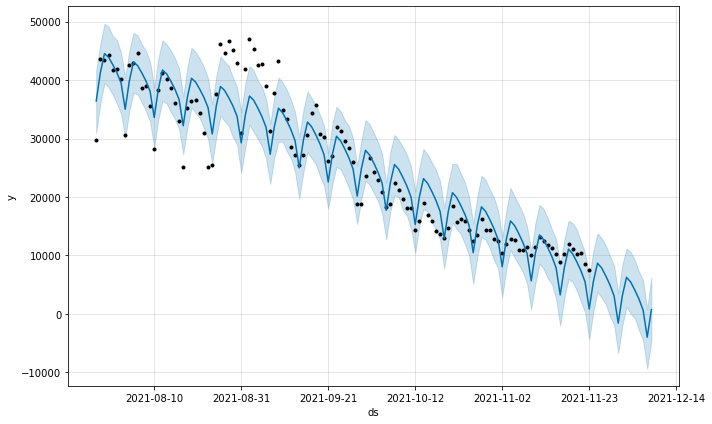

In [118]:
prophet_model_1.plot(forecast_new_case)
plt.show()

In [119]:
prophet_new_case_mae_lessData = mean_absolute_error(prophet_NewCase_test.y,forecast_new_case.yhat[-15:])
print('Mean Absolute Error  : ',prophet_new_case_mae_lessData)

Mean Absolute Error  :  5088.208519591623


####  FBProphet adopts successively progression, and avoid outliers during modeling and forecasting. The results also depicts that FBProphet can fit well in case of less data. 

### MACHINE LEARNING MODELING

In [120]:
ml_df = raw_data.copy()

In [121]:
ml_df = ml_df[ml_df['Country']=='India'].reset_index()

In [122]:
ml_df.head()

index Date_reported Country_code Country WHO_region  New_cases  \
0  67776    2020-01-03           IN   India      SEARO          0   
1  67777    2020-01-04           IN   India      SEARO          0   
2  67778    2020-01-05           IN   India      SEARO          0   
3  67779    2020-01-06           IN   India      SEARO          0   
4  67780    2020-01-07           IN   India      SEARO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [123]:
ml_df['Date_reported'] = pd.to_datetime(ml_df.Date_reported,yearfirst=True)

In [124]:
ml_df['year'] = ml_df['Date_reported'].apply(lambda x: x.year)
ml_df['month'] = ml_df['Date_reported'].apply(lambda x: x.month)
ml_df['day'] = ml_df['Date_reported'].apply(lambda x: x.day)

In [125]:
ml_df.drop(['index','Date_reported','Country_code','Country','WHO_region'],axis=1,inplace=True)

In [126]:
ml_df = ml_df[['day','month','year','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]

In [127]:
ml_df_y = ml_df['New_cases']
ml_df_X = ml_df.drop('New_cases',axis=1)

In [128]:
ml_df_X_train = ml_df_X[:-15]
ml_df_X_test = ml_df_X[-15:]

ml_df_y_train = ml_df_y[:-15]
ml_df_y_test = ml_df_y[-15:]

In [129]:
print('Training Data X : ',ml_df_X_train.shape)
print('Training Data y : ',ml_df_y_train.shape)
print('Testing Data X : ',ml_df_X_test.shape)
print('Testing Data y : ',ml_df_y_test.shape)

Training Data X :  (691, 6)
Training Data y :  (691,)
Testing Data X :  (15, 6)
Testing Data y :  (15,)


In [130]:
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
gbBoost_model = GradientBoostingRegressor(n_estimators=8000, learning_rate=0.01,
                                     max_depth=3, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42)

gbBoost_model.fit(ml_df_X_train,ml_df_y_train)
gbBoost_predict = gbBoost_model.predict(ml_df_X_test)

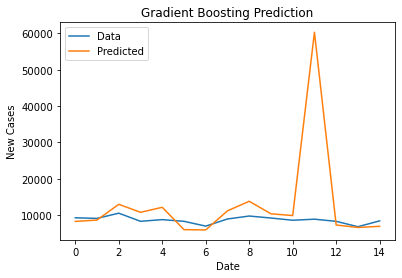

In [132]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),gbBoost_predict)
plt.title('Gradient Boosting Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [133]:
gbBoost_new_case_mae = mean_absolute_error(ml_df_y_test,gbBoost_predict)
print('Mean Absolute Error  : ',gbBoost_new_case_mae)

Mean Absolute Error  :  5066.375443390426


In [134]:
from xgboost import XGBRegressor

In [135]:
xgb_model = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7)

xgb_model.fit(ml_df_X_train,ml_df_y_train)
xgb_predict = xgb_model.predict(ml_df_X_test)

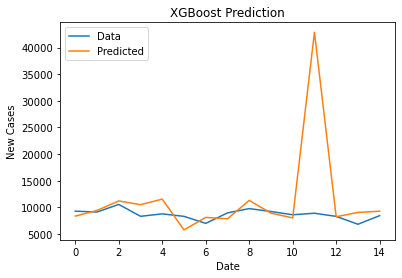

In [136]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),xgb_predict)
plt.title('XGBoost Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [137]:
xgBoost_new_case_mae = mean_absolute_error(ml_df_y_test,xgb_predict)
print('Mean Absolute Error  : ',xgBoost_new_case_mae)

Mean Absolute Error  :  3410.99248046875


### Deep Leaning Modeling

In [138]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout,RNN

In [139]:
def fit_LSTM(ml_df_X_train, ml_df_y_train, epochs):
    
    regressor = Sequential()

    regressor.add(LSTM(units = 45, return_sequences = True, input_shape = (ml_df_X_train.shape[1], 1)))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45, return_sequences = True))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45, return_sequences = True))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45))
#     regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(loss='mean_absolute_error', optimizer='adam')
    
    regressor.fit(ml_df_X_train, ml_df_y_train, epochs=epochs, batch_size=64, verbose=1)
    return regressor

In [140]:
model1 = fit_LSTM(ml_df_X_train, ml_df_y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 4s 13ms/step - loss: 49965.7031
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 49964.1562
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 49961.6094
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 49960.0586
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 49959.1680
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 49958.5195
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 49957.9727
Epoch 8/100
11/11 [==============================] - 0s 11ms/step - loss: 49957.4453
Epoch 9/100
11/11 [==============================] - 0s 11ms/step - loss: 49956.9609
Epoch 10/100
11/11 [==============================] - 0s 12ms/step - loss: 49956.4844
Epoch 11/100
11/11 [==============================] - 0s 12ms/step - loss: 49956.0117
Epoch 12/100
11/11 [==============================] - 0s 12ms/s

11/11 [==============================] - 0s 11ms/step - loss: 49921.8711
Epoch 97/100
11/11 [==============================] - ETA: 0s - loss: 50107.125 - 0s 13ms/step - loss: 49921.4805
Epoch 98/100
11/11 [==============================] - 0s 15ms/step - loss: 49921.0938
Epoch 99/100
11/11 [==============================] - 0s 14ms/step - loss: 49920.7070
Epoch 100/100
11/11 [==============================] - 0s 14ms/step - loss: 49920.3125


In [141]:
lstm_predict = model1.predict(ml_df_X_test)

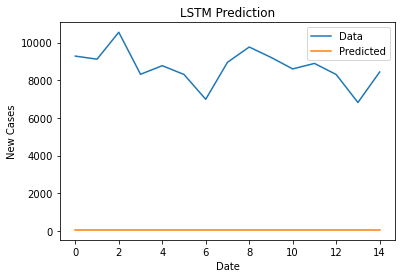

In [142]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),lstm_predict)
plt.title('LSTM Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [143]:
lstm_new_case_mae = mean_absolute_error(ml_df_y_test,lstm_predict)
print('Mean Absolute Error  : ',lstm_new_case_mae)

Mean Absolute Error  :  8631.014812723795


### RESULTS OF MODELS ON NEW CASES

In [144]:
New_cases_result = pd.DataFrame([['ARIMA (1,0,1)',mae_arima_1],['ARIMA (2,0,5)',mae_arima_2],['ARIMA (2,0,10)',mae_arima_3]
                                 ,['ARIMA (2,0,20)',mae_arima_4],['ARIMA (2,0,25)',mae_arima_5],['ARIMA (2,0,30)',mae_arima_6]
                                 ,['ARIMA (5,0,40)',mae_arima_7],['ARIMA (5,0,20)',mae_arima_8],['AUTO ARIMA ',auto_arima_mae]
                                 ,['PROPHET (ENTIRE DATASET)',prophet_new_case_mae],['PROPHET (100 DATASET)',prophet_new_case_mae_lessData]
                                 ,['Gradient Boost',gbBoost_new_case_mae],['XGBoost',xgBoost_new_case_mae],['LSTM',lstm_new_case_mae]], columns=['Model','MEAN ABSOLUTE ERROR'])

In [145]:
New_cases_result.sort_values(by='MEAN ABSOLUTE ERROR')

Model  MEAN ABSOLUTE ERROR
7             ARIMA (5,0,20)           605.358332
3             ARIMA (2,0,20)           692.752369
6             ARIMA (5,0,40)           701.400309
5             ARIMA (2,0,30)           788.124576
0              ARIMA (1,0,1)           801.316360
1              ARIMA (2,0,5)           862.787907
2             ARIMA (2,0,10)           990.359782
4             ARIMA (2,0,25)          1295.575125
8                AUTO ARIMA           1488.290487
12                   XGBoost          3410.992480
11            Gradient Boost          5066.375443
10     PROPHET (100 DATASET)          5088.208520
13                      LSTM          8631.014813
9   PROPHET (ENTIRE DATASET)         39592.553338

### NEW DEATH

### ACF & PACF PLOTS

In [154]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

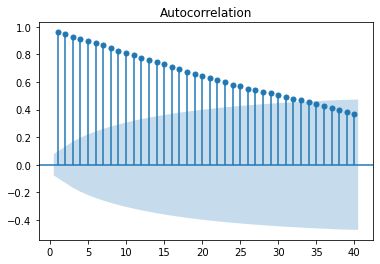

In [155]:
plot_acf(df_india_New_Death_log,lags=40,zero=False)
plt.show()

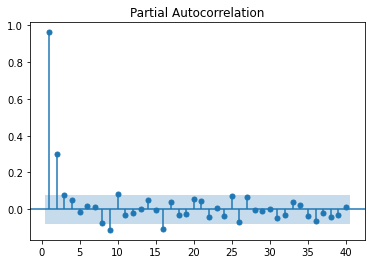

In [156]:
plot_pacf(df_india_New_Death_log,lags=40,zero=False)
plt.show()

### TRAIN - TEST SPLIT

In [157]:
new_death_train = df_india_New_Death_log[:-15]
new_death_test = df_india_New_Death_log[-15:]

### 1. ARIMA MODEL

In [158]:
from statsmodels.tsa.arima.model import ARIMA

In [159]:
arima_model_1 = ARIMA(new_death_train,order=(1,0,1))
arima_model_1 = arima_model_1.fit()
arima_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -71.461
Date:                Wed, 02 Feb 2022   AIC                            150.923
Time:                        13:46:06   BIC                            168.648
Sample:                    03-13-2020   HQIC                           157.812
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5148      2.264      1.553      0.121      -0.922       7.952
ar.L1          0.9990      0.002    539.553      0.000       0.995       1.003
ma.L1         -0.5408      0.020    -26.884      0.000      -0.580      -0.501
sigma2         0.0731      0.002     43.986      0.000       0.070       0.076
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):              4575.95
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.75
Prob(H) (two-sided):                  0.57   Kurtosis:                        15.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

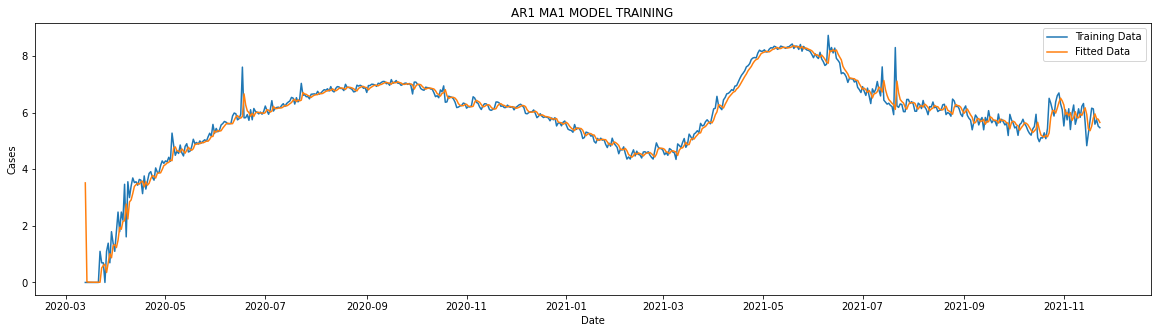

In [160]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_1.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

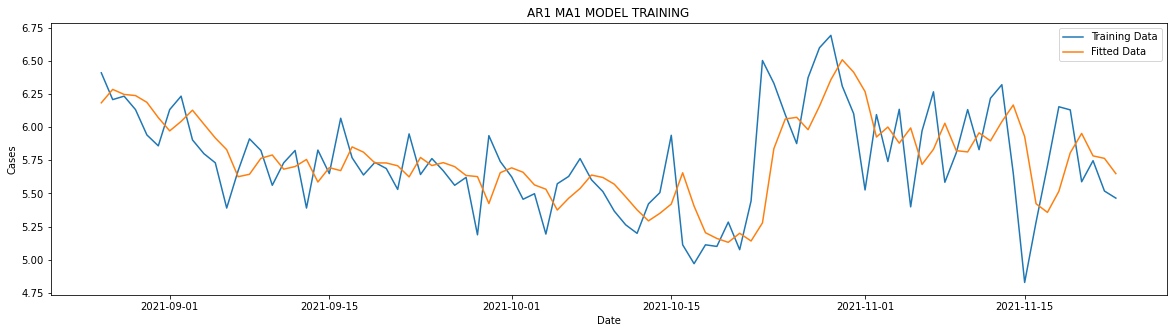

In [161]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_1.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

In [162]:
arima_prediction1 = arima_model_1.predict(start = '2021-11-24' ,end = '2021-12-08')

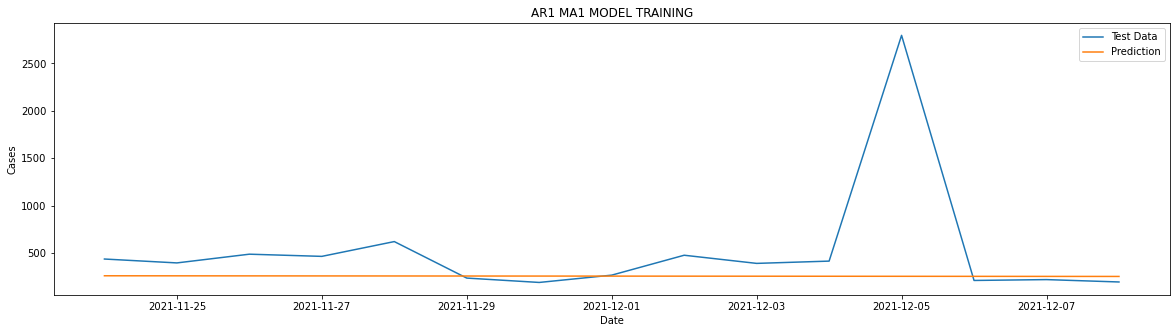

In [163]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction1))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR1 MA1 MODEL TRAINING')
plt.show()

In [164]:
from sklearn.metrics import mean_absolute_error

In [165]:
mae_arima_1_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction1))
print('Mean Absolute Error  : ',mae_arima_1_death)

Mean Absolute Error  :  293.4695474091903


We can see that our model predicted a liner line with MAE of 293.469 as it is a AR 1 and MA 1 Model.


#### FITTING AR2 MA5 MODEL

In [166]:
arima_model_2 = ARIMA(new_death_train,order=(2,0,5))
arima_model_2 = arima_model_2.fit()
arima_model_2.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                 ARIMA(2, 0, 5)   Log Likelihood                 -65.708
Date:                Wed, 02 Feb 2022   AIC                            149.417
Time:                        13:46:09   BIC                            189.299
Sample:                    03-13-2020   HQIC                           164.918
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5922      2.169      1.656      0.098      -0.659       7.843
ar.L1          0.0904      1.168      0.077      0.938      -2.199       2.380
ar.L2          0.9074      1.167      0.778      0.437      -1.379       3.194
ma.L1          0.3014      1.166      0.258      0.796      -1.985       2.587
ma.L2         -0.5319      0.709     -0.750      0.453      -1.921       0.858
ma.L3         -0.0194      0.042     -0.459      0.646      -0.102       0.063
ma.L4          0.0997      0.060      1.666      0.096      -0.018       0.217
ma.L5          0.1172      0.173      0.678      0.498      -0.221       0.456
sigma2         0.0717      0.002     41.427      0.000       0.068       0.075
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4631.27
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.76
Prob(H) (two-sided):                  0.22   Kurtosis:                        15.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

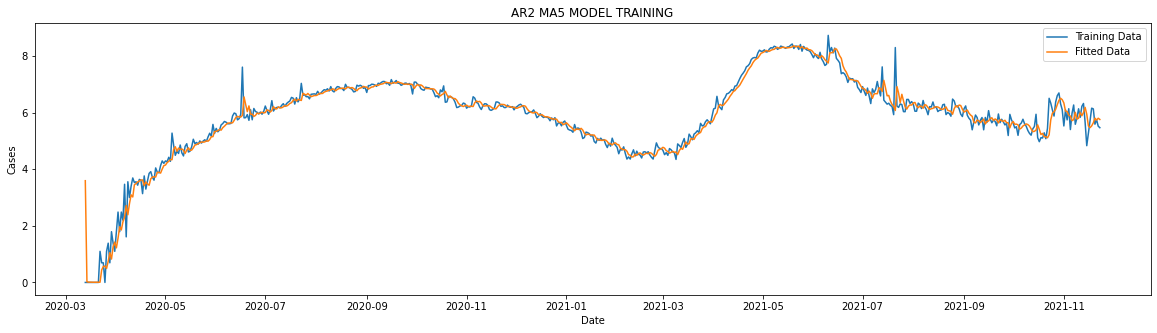

In [167]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_2.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

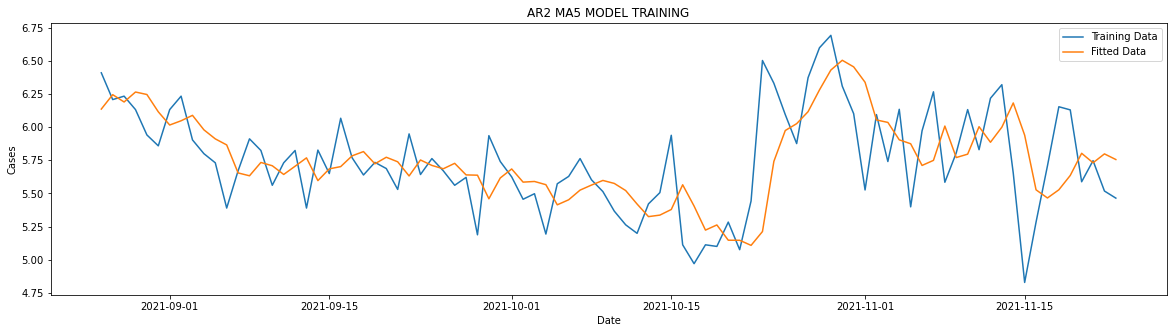

In [168]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_2.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

In [169]:
arima_prediction2 = arima_model_2.predict(start = '2021-11-24' ,end = '2021-12-08')

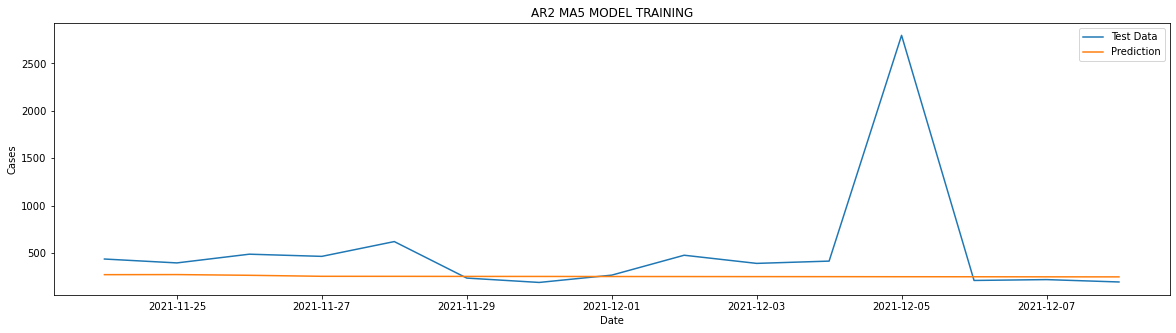

In [170]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction2))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA5 MODEL TRAINING')
plt.show()

In [171]:
mae_arima_2_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction2))

print('Mean Absolute Error  : ',mae_arima_2_death)

Mean Absolute Error  :  291.920624581471


#### FITTING AR2 MA10 MODEL

In [172]:
arima_model_3 = ARIMA(new_death_train,order=(2,0,10))
arima_model_3 = arima_model_3.fit()
arima_model_3.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(2, 0, 10)   Log Likelihood                 -53.153
Date:                Wed, 02 Feb 2022   AIC                            134.307
Time:                        13:46:11   BIC                            196.345
Sample:                    03-13-2020   HQIC                           158.420
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0744      1.598      2.550      0.011       0.943       7.206
ar.L1          0.8960      0.293      3.058      0.002       0.322       1.470
ar.L2          0.1013      0.292      0.347      0.729      -0.471       0.674
ma.L1         -0.5015      0.297     -1.689      0.091      -1.084       0.081
ma.L2         -0.0373      0.183     -0.204      0.838      -0.395       0.321
ma.L3         -0.0373      0.041     -0.902      0.367      -0.118       0.044
ma.L4          0.0614      0.035      1.735      0.083      -0.008       0.131
ma.L5          0.0265      0.042      0.631      0.528      -0.056       0.109
ma.L6          0.0647      0.040      1.605      0.109      -0.014       0.144
ma.L7          0.0521      0.041      1.261      0.207      -0.029       0.133
ma.L8          0.0537      0.036      1.472      0.141      -0.018       0.125
ma.L9         -0.1217      0.042     -2.916      0.004      -0.204      -0.040
ma.L10         0.1149      0.040      2.879      0.004       0.037       0.193
sigma2         0.0689      0.002     36.052      0.000       0.065       0.073
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              4552.55
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             1.73
Prob(H) (two-sided):                  0.15   Kurtosis:                        15.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

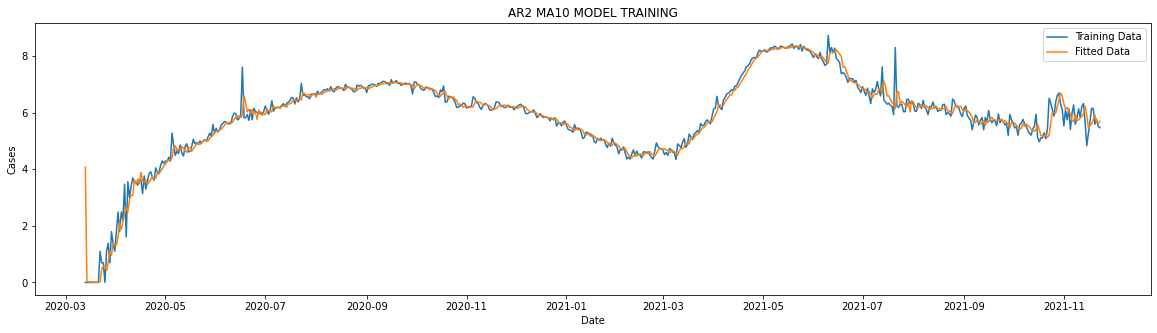

In [173]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_3.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

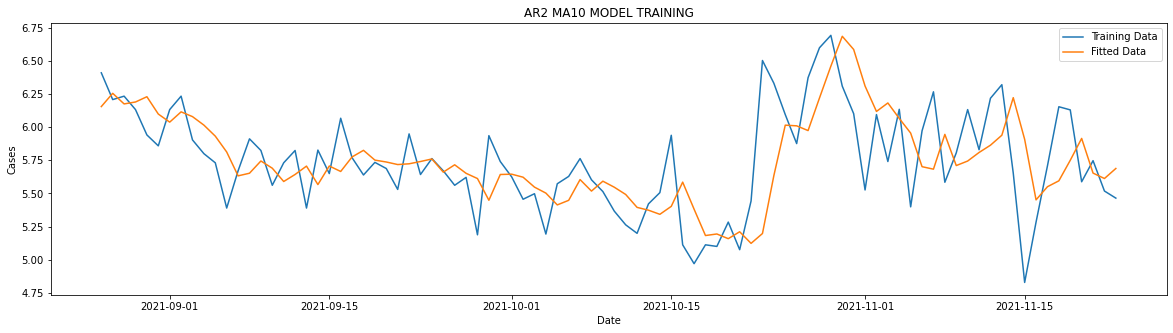

In [174]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_3.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

In [175]:
arima_prediction3 = arima_model_3.predict(start = '2021-11-24' ,end = '2021-12-08')

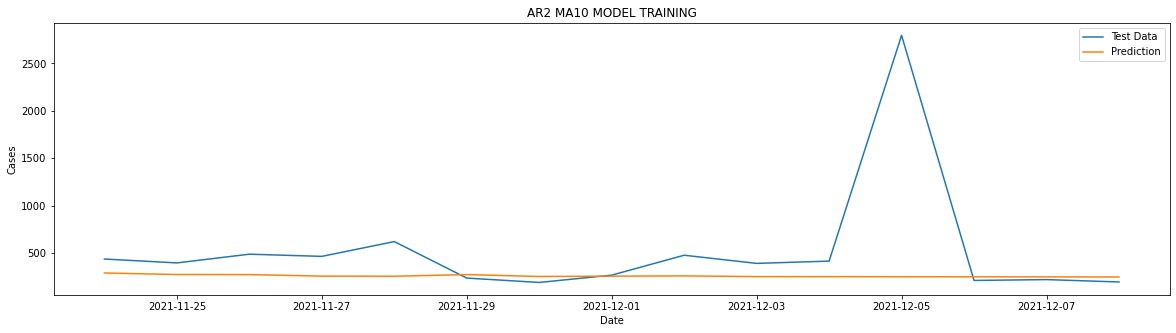

In [176]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction3))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA10 MODEL TRAINING')
plt.show()

In [177]:
mae_arima_3_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction3))
print('Mean Absolute Error  : ',mae_arima_3_death)

Mean Absolute Error  :  290.35821646557235


#### FITTING AR2 MA20 MODEL

In [178]:
arima_model_4 = ARIMA(new_death_train,order=(2,0,20))
arima_model_4 = arima_model_4.fit()
arima_model_4.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(2, 0, 20)   Log Likelihood                 -35.513
Date:                Wed, 02 Feb 2022   AIC                            119.025
Time:                        13:46:17   BIC                            225.377
Sample:                    03-13-2020   HQIC                           160.362
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0112      1.055      4.752      0.000       2.944       7.078
ar.L1          1.3682      0.827      1.654      0.098      -0.253       2.989
ar.L2         -0.3728      0.821     -0.454      0.650      -1.983       1.237
ma.L1         -0.9915      0.828     -1.197      0.231      -2.615       0.632
ma.L2          0.2822      0.511      0.552      0.581      -0.719       1.284
ma.L3         -0.0552      0.060     -0.920      0.358      -0.173       0.062
ma.L4          0.0849      0.053      1.600      0.110      -0.019       0.189
ma.L5         -0.0206      0.079     -0.262      0.793      -0.175       0.133
ma.L6          0.0623      0.049      1.277      0.202      -0.033       0.158
ma.L7          0.0592      0.078      0.764      0.445      -0.093       0.211
ma.L8          0.0509      0.086      0.592      0.554      -0.118       0.219
ma.L9         -0.1426      0.077     -1.850      0.064      -0.294       0.008
ma.L10         0.1236      0.113      1.095      0.274      -0.098       0.345
ma.L11        -0.1193      0.093     -1.284      0.199      -0.302       0.063
ma.L12        -0.0020      0.094     -0.022      0.983      -0.187       0.183
ma.L13         0.1391      0.068      2.049      0.040       0.006       0.272
ma.L14         0.0953      0.104      0.918      0.359      -0.108       0.299
ma.L15        -0.0367      0.145     -0.253      0.800      -0.321       0.248
ma.L16        -0.1157      0.066     -1.758      0.079      -0.245       0.013
ma.L17         0.1365      0.109      1.248      0.212      -0.078       0.351
ma.L18        -0.0412      0.094     -0.440      0.660      -0.225       0.142
ma.L19        -0.0328      0.063     -0.522      0.602      -0.156       0.090
ma.L20         0.0474      0.048      0.997      0.319      -0.046       0.141
sigma2         0.0648      0.002     36.420      0.000       0.061       0.068
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              5192.95
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             1.78
Prob(H) (two-sided):                  0.18   Kurtosis:                        16.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

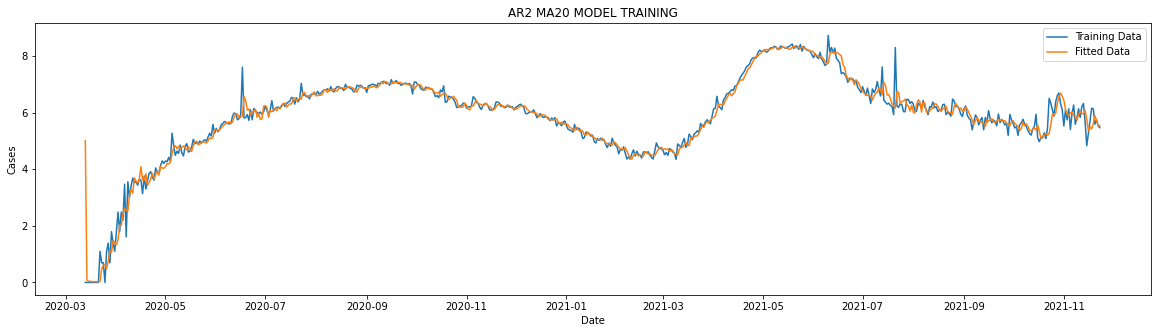

In [179]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_4.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

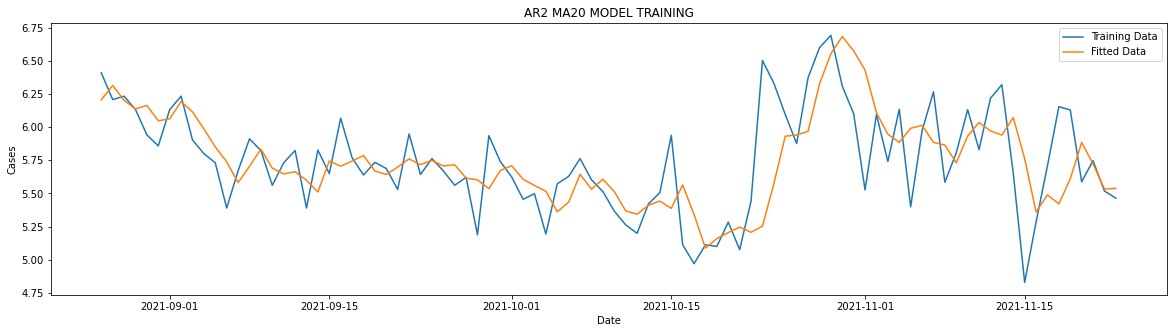

In [180]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_4.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

In [181]:
arima_prediction4 = arima_model_4.predict(start = '2021-11-24' ,end = '2021-12-08')

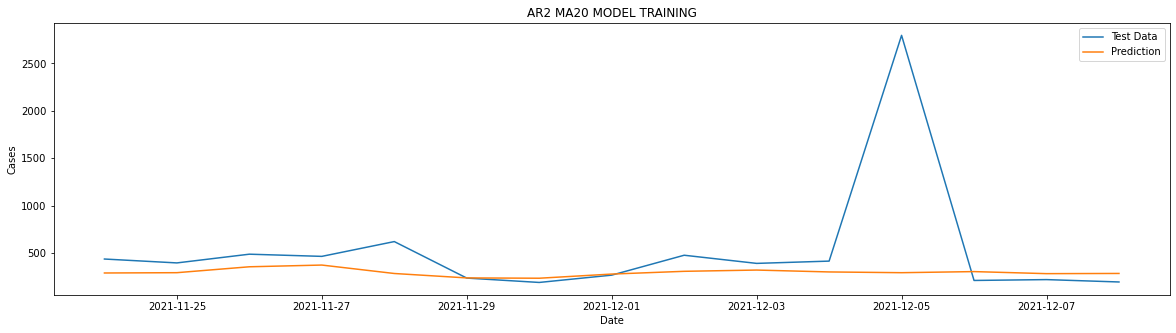

In [182]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction4))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA20 MODEL TRAINING')
plt.show()

In [183]:
mae_arima_4_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction4))
print('Mean Absolute Error  : ',mae_arima_4_death)

Mean Absolute Error  :  264.81754758365605


#### FITTING AR2 MA25 MODEL

In [184]:
arima_model_5 = ARIMA(new_death_train,order=(2,0,25))
arima_model_5 = arima_model_5.fit()
arima_model_5.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(2, 0, 25)   Log Likelihood                 -27.249
Date:                Wed, 02 Feb 2022   AIC                            112.498
Time:                        13:46:25   BIC                            241.006
Sample:                    03-13-2020   HQIC                           162.446
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7904      1.203      3.983      0.000       2.433       7.148
ar.L1          0.9459      0.333      2.845      0.004       0.294       1.598
ar.L2          0.0474      0.331      0.143      0.886      -0.601       0.696
ma.L1         -0.5958      0.329     -1.814      0.070      -1.240       0.048
ma.L2          0.0068      0.218      0.031      0.975      -0.420       0.434
ma.L3         -0.0292      0.051     -0.570      0.569      -0.129       0.071
ma.L4          0.0715      0.041      1.726      0.084      -0.010       0.153
ma.L5          0.0243      0.051      0.478      0.633      -0.075       0.124
ma.L6          0.0710      0.039      1.798      0.072      -0.006       0.148
ma.L7          0.0569      0.052      1.104      0.270      -0.044       0.158
ma.L8          0.0501      0.039      1.286      0.198      -0.026       0.126
ma.L9         -0.1595      0.043     -3.720      0.000      -0.244      -0.075
ma.L10         0.1080      0.072      1.497      0.135      -0.033       0.249
ma.L11        -0.0074      0.064     -0.115      0.909      -0.133       0.119
ma.L12        -0.0219      0.050     -0.440      0.660      -0.119       0.076
ma.L13         0.0875      0.051      1.730      0.084      -0.012       0.187
ma.L14         0.1394      0.051      2.751      0.006       0.040       0.239
ma.L15        -0.0269      0.075     -0.361      0.718      -0.173       0.119
ma.L16        -0.1544      0.054     -2.867      0.004      -0.260      -0.049
ma.L17         0.1091      0.065      1.687      0.092      -0.018       0.236
ma.L18         0.0330      0.055      0.600      0.549      -0.075       0.141
ma.L19        -0.0068      0.056     -0.122      0.903      -0.116       0.102
ma.L20         0.1289      0.053      2.428      0.015       0.025       0.233
ma.L21        -0.0425      0.073     -0.583      0.560      -0.185       0.100
ma.L22        -0.0821      0.065     -1.256      0.209      -0.210       0.046
ma.L23        -0.0143      0.059     -0.243      0.808      -0.130       0.101
ma.L24         0.0331      0.061      0.540      0.589      -0.087       0.153
ma.L25         0.1497      0.060      2.504      0.012       0.033       0.267
sigma2         0.0634      0.002     33.722      0.000       0.060       0.067
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4770.20
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.85
Prob(H) (two-sided):                  0.21   Kurtosis:                        16.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

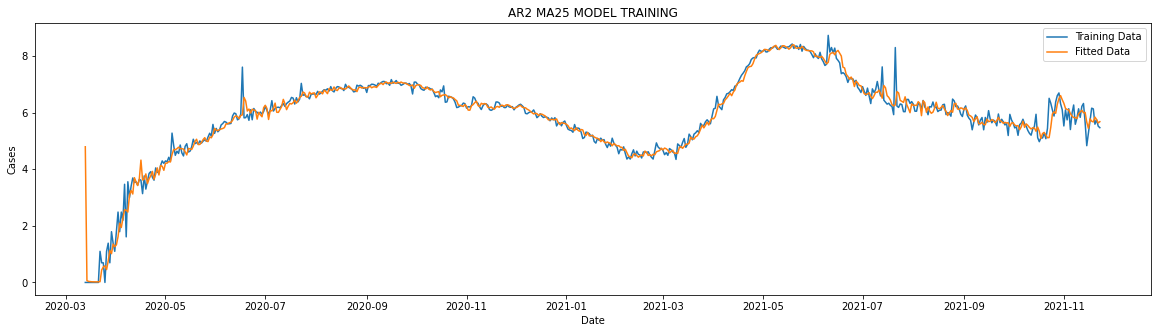

In [185]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_5.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

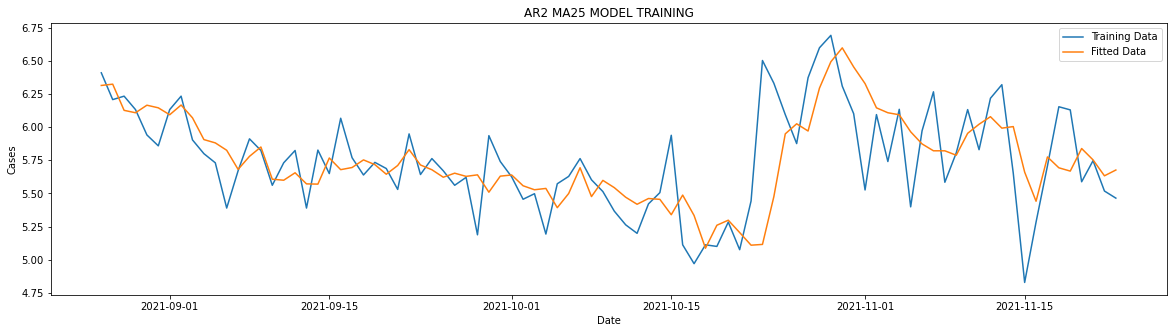

In [186]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_5.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

In [187]:
arima_prediction5 = arima_model_5.predict(start = '2021-11-24' ,end = '2021-12-08')

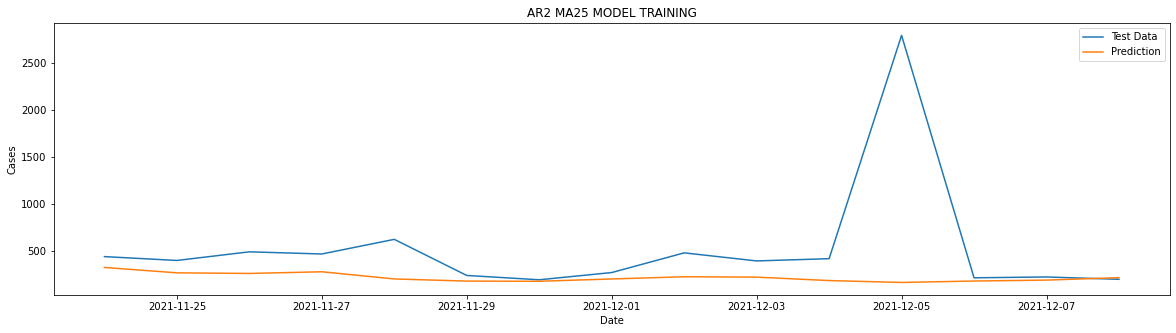

In [188]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction5))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA25 MODEL TRAINING')
plt.show()

In [189]:
mae_arima_5_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction5))
print('Mean Absolute Error  : ',mae_arima_5_death)

Mean Absolute Error  :  307.6880128673875


#### FITTING AR2 MA30 MODEL

In [190]:
arima_model_6 = ARIMA(new_death_train,order=(2,0,30))
arima_model_6 = arima_model_6.fit()
arima_model_6.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(2, 0, 30)   Log Likelihood                 -19.361
Date:                Wed, 02 Feb 2022   AIC                            106.722
Time:                        13:46:39   BIC                            257.387
Sample:                    03-13-2020   HQIC                           165.282
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5682      3.122      1.784      0.074      -0.550      11.687
ar.L1          0.4645      0.900      0.516      0.606      -1.300       2.229
ar.L2          0.5294      0.899      0.589      0.556      -1.232       2.291
ma.L1         -0.1219      0.900     -0.135      0.892      -1.886       1.642
ma.L2         -0.3036      0.592     -0.513      0.608      -1.463       0.856
ma.L3         -0.0240      0.059     -0.406      0.685      -0.140       0.092
ma.L4          0.0517      0.056      0.923      0.356      -0.058       0.161
ma.L5          0.0426      0.085      0.501      0.616      -0.124       0.209
ma.L6          0.0511      0.037      1.383      0.167      -0.021       0.123
ma.L7          0.0845      0.061      1.387      0.166      -0.035       0.204
ma.L8          0.0848      0.059      1.427      0.153      -0.032       0.201
ma.L9         -0.1183      0.066     -1.805      0.071      -0.247       0.010
ma.L10         0.0274      0.142      0.193      0.847      -0.251       0.305
ma.L11         0.0093      0.102      0.091      0.928      -0.191       0.210
ma.L12        -0.0465      0.054     -0.856      0.392      -0.153       0.060
ma.L13         0.1007      0.047      2.143      0.032       0.009       0.193
ma.L14         0.2043      0.111      1.833      0.067      -0.014       0.423
ma.L15         0.0498      0.147      0.339      0.735      -0.238       0.338
ma.L16        -0.1326      0.062     -2.145      0.032      -0.254      -0.011
ma.L17         0.0663      0.124      0.536      0.592      -0.176       0.308
ma.L18         0.0834      0.125      0.670      0.503      -0.161       0.327
ma.L19         0.0247      0.056      0.441      0.659      -0.085       0.135
ma.L20         0.1651      0.048      3.437      0.001       0.071       0.259
ma.L21         0.0368      0.154      0.239      0.811      -0.265       0.338
ma.L22        -0.0830      0.061     -1.350      0.177      -0.203       0.038
ma.L23         0.0180      0.069      0.260      0.795      -0.118       0.154
ma.L24         0.0523      0.079      0.662      0.508      -0.102       0.207
ma.L25         0.1232      0.052      2.349      0.019       0.020       0.226
ma.L26         0.0847      0.110      0.772      0.440      -0.130       0.300
ma.L27         0.1347      0.059      2.291      0.022       0.019       0.250
ma.L28         0.0259      0.119      0.218      0.828      -0.207       0.259
ma.L29         0.0370      0.047      0.788      0.431      -0.055       0.129
ma.L30         0.0794      0.063      1.264      0.206      -0.044       0.202
sigma2         0.0610      0.003     24.053      0.000       0.056       0.066
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              5442.52
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                

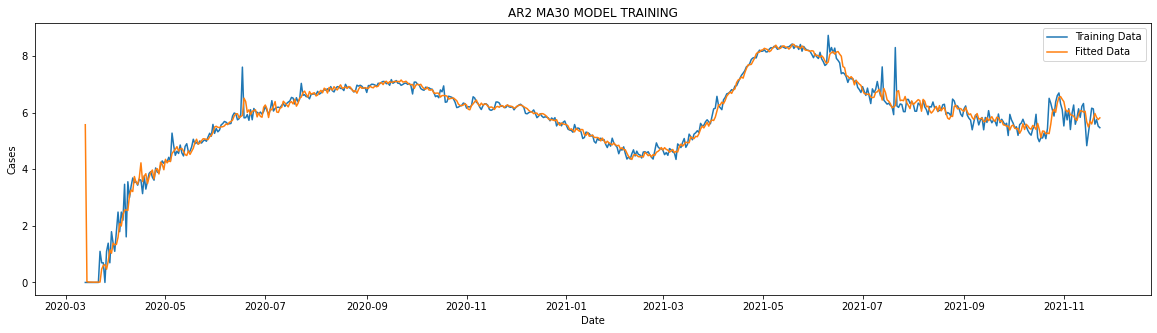

In [191]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_6.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

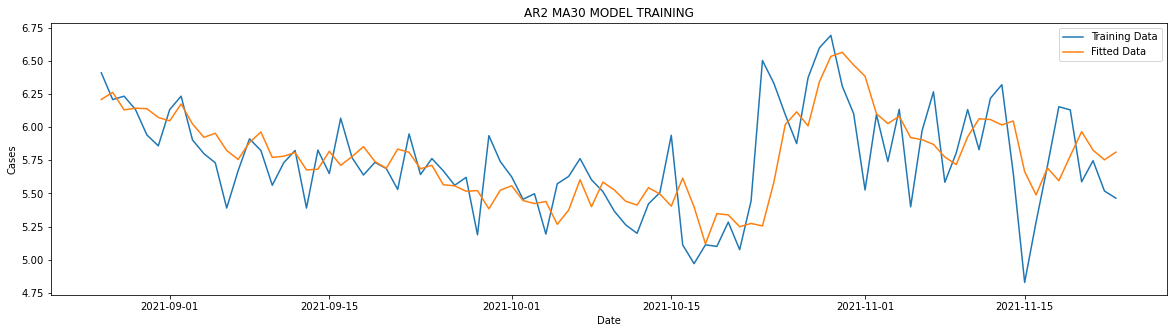

In [192]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_6.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

In [193]:
arima_prediction6 = arima_model_6.predict(start = '2021-11-24' ,end = '2021-12-08')

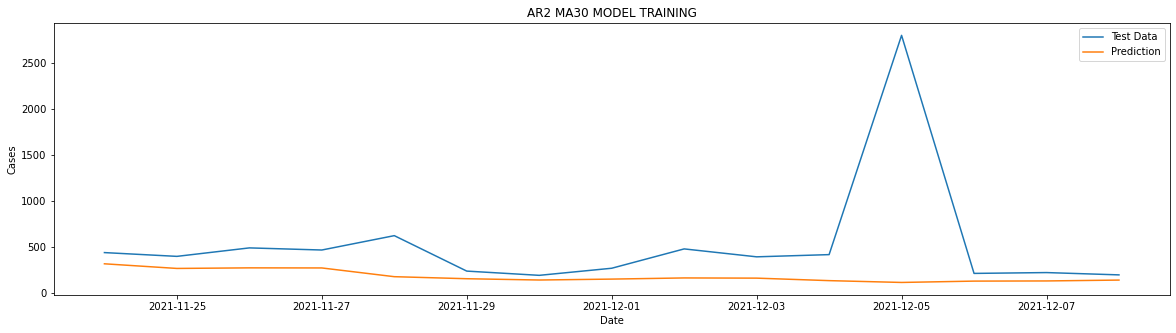

In [194]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction6))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA30 MODEL TRAINING')
plt.show()

In [195]:
mae_arima_6_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction6))
print('Mean Absolute Error  : ',mae_arima_6_death)

Mean Absolute Error  :  340.31404931329183


#### FITTING AR5 MA40 MODEL

In [196]:
arima_model_7 = ARIMA(new_death_train,order=(5,0,40))
arima_model_7 = arima_model_7.fit()
arima_model_7.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(5, 0, 40)   Log Likelihood                 -10.144
Date:                Wed, 02 Feb 2022   AIC                            114.289
Time:                        13:47:14   BIC                            322.561
Sample:                    03-13-2020   HQIC                           195.240
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7019      3.365      1.695      0.090      -0.893      12.297
ar.L1          0.6438      0.657      0.980      0.327      -0.644       1.932
ar.L2          0.2377      0.875      0.272      0.786      -1.477       1.953
ar.L3         -0.2482      0.619     -0.401      0.688      -1.461       0.964
ar.L4         -0.2834      0.737     -0.385      0.701      -1.727       1.161
ar.L5          0.6403      0.543      1.179      0.238      -0.424       1.705
ma.L1         -0.3047      0.657     -0.464      0.643      -1.592       0.983
ma.L2         -0.0586      0.677     -0.087      0.931      -1.385       1.268
ma.L3          0.2703      0.515      0.525      0.599      -0.738       1.279
ma.L4          0.4789      0.645      0.742      0.458      -0.786       1.744
ma.L5         -0.4054      0.328     -1.235      0.217      -1.049       0.238
ma.L6          0.0564      0.062      0.915      0.360      -0.064       0.177
ma.L7          0.0633      0.069      0.918      0.358      -0.072       0.199
ma.L8          0.1369      0.092      1.482      0.138      -0.044       0.318
ma.L9         -0.0865      0.057     -1.523      0.128      -0.198       0.025
ma.L10         0.1354      0.086      1.567      0.117      -0.034       0.305
ma.L11         0.0122      0.142      0.086      0.931      -0.265       0.290
ma.L12        -0.0527      0.109     -0.483      0.629      -0.266       0.161
ma.L13         0.0367      0.130      0.281      0.779      -0.219       0.292
ma.L14         0.2264      0.153      1.476      0.140      -0.074       0.527
ma.L15         0.0055      0.087      0.064      0.949      -0.164       0.175
ma.L16        -0.0668      0.077     -0.865      0.387      -0.218       0.085
ma.L17         0.2000      0.085      2.346      0.019       0.033       0.367
ma.L18         0.1264      0.179      0.706      0.480      -0.224       0.477
ma.L19        -0.0419      0.090     -0.464      0.642      -0.219       0.135
ma.L20         0.1374      0.105      1.310      0.190      -0.068       0.343
ma.L21         0.0821      0.179      0.457      0.647      -0.270       0.434
ma.L22        -0.0301      0.108     -0.279      0.780      -0.242       0.181
ma.L23         0.1168      0.101      1.154      0.248      -0.081       0.315
ma.L24         0.1474      0.170      0.869      0.385      -0.185       0.480
ma.L25         0.0801      0.079      1.013      0.311      -0.075       0.235
ma.L26         0.0018      0.090      0.020      0.984      -0.175       0.178
ma.L27         0.1762      0.078      2.269      0.023       0.024       0.328
ma.L28         0.0335      0.118      0.284      0.776      -0.198       0.265
ma.L29         0.1908      0.095      2.011      0.044       0.005       0.377
ma.L30         0.1506      0.118      1.282      0.200      -0.080       0.381
ma.L31        -0.0166      0.146     -0.114      0.909      -0.302       0.269
ma.L32        -0.0478      0.146     -0.327      0.744      -0.334       0.239
ma

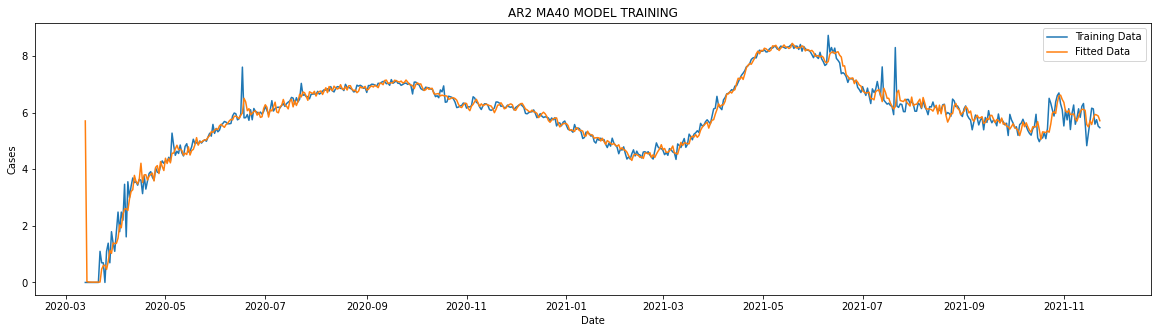

In [197]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train)
plt.plot(arima_model_7.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

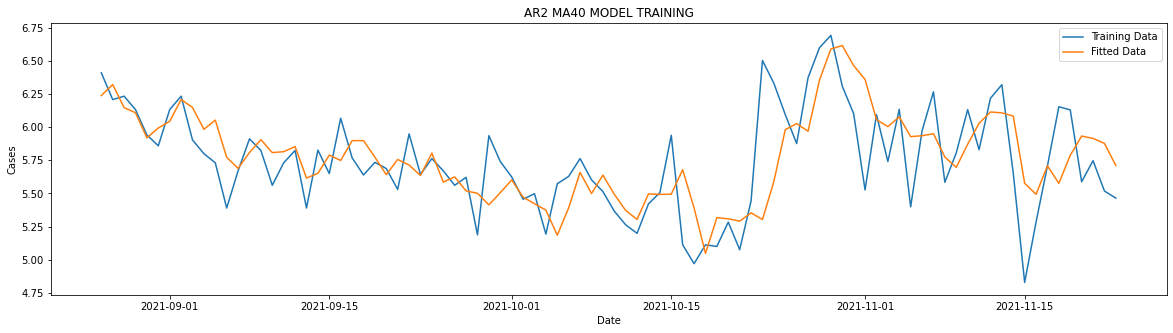

In [198]:
plt.figure(figsize=(20,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_7.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

In [199]:
arima_prediction7 = arima_model_7.predict(start = '2021-11-24' ,end = '2021-12-08')

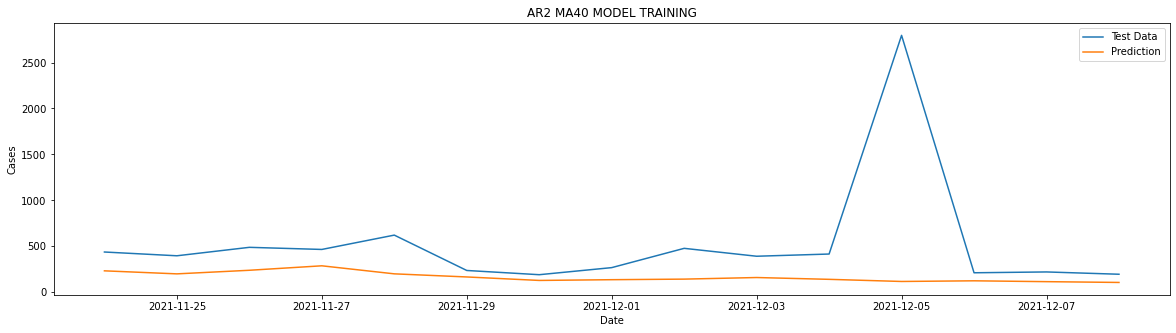

In [200]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction7))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR2 MA40 MODEL TRAINING')
plt.show()

In [201]:
mae_arima_7_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction7))
print('Mean Absolute Error  : ',mae_arima_7_death)

Mean Absolute Error  :  354.7068024956209


#### FITTING AR5 MA20 MODEL

In [202]:
arima_model_8 = ARIMA(new_death_train,order=(5,0,20))
arima_model_8 = arima_model_8.fit()
arima_model_8.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                  621
Model:                ARIMA(5, 0, 20)   Log Likelihood                 -23.526
Date:                Wed, 02 Feb 2022   AIC                            101.052
Time:                        13:47:21   BIC                            220.698
Sample:                    03-13-2020   HQIC                           147.556
                         - 11-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7500     11.841      0.486      0.627     -17.458      28.958
ar.L1          0.8987      0.157      5.737      0.000       0.592       1.206
ar.L2          0.1234      0.269      0.459      0.646      -0.404       0.650
ar.L3         -0.4706      0.242     -1.941      0.052      -0.946       0.005
ar.L4         -0.2658      0.226     -1.174      0.241      -0.710       0.178
ar.L5          0.7133      0.139      5.117      0.000       0.440       0.987
ma.L1         -0.5479      0.154     -3.554      0.000      -0.850      -0.246
ma.L2         -0.0176      0.222     -0.079      0.937      -0.453       0.418
ma.L3          0.4600      0.205      2.249      0.025       0.059       0.861
ma.L4          0.5035      0.197      2.562      0.010       0.118       0.889
ma.L5         -0.4214      0.098     -4.287      0.000      -0.614      -0.229
ma.L6          0.0901      0.050      1.789      0.074      -0.009       0.189
ma.L7          0.0614      0.052      1.191      0.233      -0.040       0.162
ma.L8          0.1443      0.046      3.129      0.002       0.054       0.235
ma.L9         -0.0927      0.045     -2.042      0.041      -0.182      -0.004
ma.L10         0.1457      0.056      2.609      0.009       0.036       0.255
ma.L11         0.0204      0.065      0.313      0.754      -0.107       0.148
ma.L12        -0.0199      0.065     -0.306      0.760      -0.148       0.108
ma.L13         0.0460      0.065      0.706      0.480      -0.082       0.174
ma.L14         0.1963      0.056      3.529      0.000       0.087       0.305
ma.L15        -0.0550      0.067     -0.820      0.412      -0.187       0.076
ma.L16        -0.0883      0.056     -1.579      0.114      -0.198       0.021
ma.L17         0.1995      0.063      3.190      0.001       0.077       0.322
ma.L18         0.1010      0.059      1.719      0.086      -0.014       0.216
ma.L19        -0.0982      0.060     -1.648      0.099      -0.215       0.019
ma.L20         0.0922      0.056      1.643      0.100      -0.018       0.202
sigma2         0.0619      0.002     27.082      0.000       0.057       0.066
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5156.14
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             2.00
Prob(H) (two-sided):                  0.30   Kurtosis:                        16.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

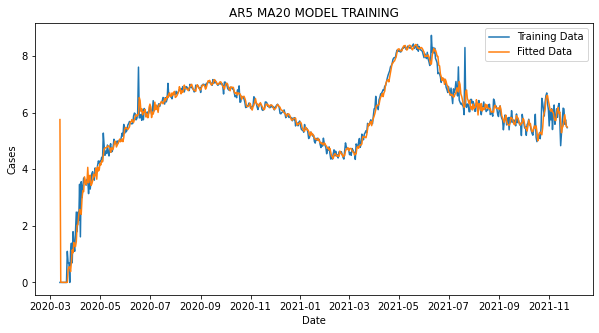

In [203]:
plt.figure(figsize=(10,5))
plt.plot(new_death_train)
plt.plot(arima_model_8.fittedvalues)
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

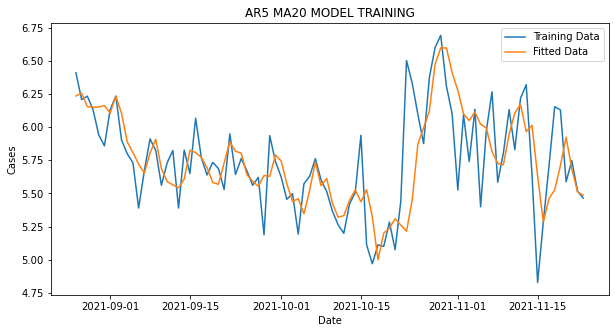

In [204]:
plt.figure(figsize=(10,5))
plt.plot(new_death_train[-90:])
plt.plot(arima_model_8.fittedvalues[-90:])
plt.legend(['Training Data','Fitted Data'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

In [205]:
arima_prediction8 = arima_model_8.predict(start = '2021-11-24' ,end = '2021-12-08')

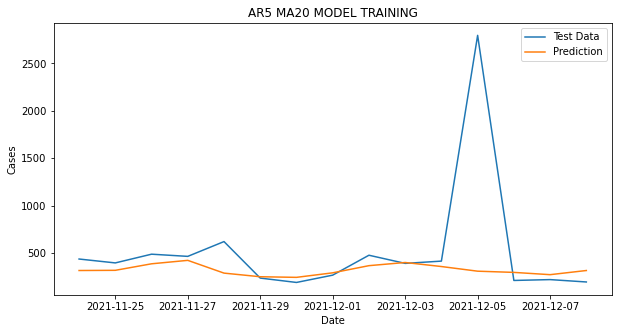

In [206]:
plt.figure(figsize=(10,5))
plt.plot(np.exp(new_death_test))
plt.plot(np.exp(arima_prediction8))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AR5 MA20 MODEL TRAINING')
plt.show()

In [207]:
mae_arima_8_death = mean_absolute_error(np.exp(new_death_test),np.exp(arima_prediction8))
print('Mean Absolute Error  : ',mae_arima_8_death)

Mean Absolute Error  :  245.94482658654093


### 2. AUTO ARIMA

In [208]:
from pmdarima.arima import auto_arima

In [209]:
auto_arima_model = auto_arima(new_death_train)

exogenous -> outside factors (e.g other time series)

m -> seasonal cycle length

max_order -> maximum amount of variables to be used in the regression (p + q)

max_p -> maximum AR components

max_q -> maximum MA components

max_d -> maximum Integrations

maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)

alpha -> level of significance, default is 5%, which we should be using most of the time

n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")

trend -> "ct" usually

Information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
(Akaike Information Criterion, Corrected Akaike Information Criterion,Bayesian Information Criterion, Hannan-Quinn Information Criterion, or "out of bag"--for validation scoring--respectively)

out_of_smaple -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

In [210]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  621
Model:               SARIMAX(0, 2, 2)   Log Likelihood                 -52.300
Date:                Wed, 02 Feb 2022   AIC                            110.600
Time:                        13:47:23   BIC                            123.884
Sample:                             0   HQIC                           115.764
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6528      0.021    -80.508      0.000      -1.693      -1.613
ma.L2          0.6742      0.020     33.159      0.000       0.634       0.714
sigma2         0.0688      0.002     44.804      0.000       0.066       0.072
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              5307.25
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             1.66
Prob(H) (two-sided):                  0.05   Kurtosis:                        16.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
auto_arima_prediction = auto_arima_model.predict(n_periods=15)

In [212]:
np.exp(auto_arima_prediction)

array([266.99050417, 263.32829716, 259.71632324, 256.15389339,
       252.64032804, 249.17495692, 245.75711898, 242.38616222,
       239.06144359, 235.78232886, 232.54819249, 229.35841755,
       226.21239552, 223.10952629, 220.04921793])

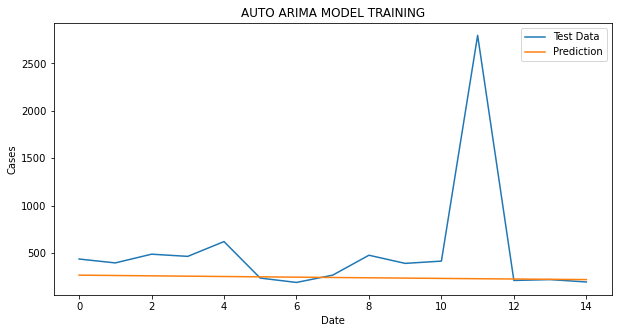

In [213]:
plt.figure(figsize=(10,5))
plt.plot(range(len(new_death_test)),np.exp(new_death_test))
plt.plot(range(len(new_death_test)),np.exp(auto_arima_prediction))
plt.legend(['Test Data','Prediction'])
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('AUTO ARIMA MODEL TRAINING')
plt.show()

In [214]:
auto_arima_mae_death = mean_absolute_error(np.exp(new_death_test),np.exp(auto_arima_prediction))
print('Mean Absolute Error  : ',auto_arima_mae_death)

Mean Absolute Error  :  292.4891549959741


### 3. FACEBOOK PROPHET

In [215]:
from fbprophet import Prophet

In [216]:
prophet_NewDeath_train.head()

ds  y
0  2020-01-03  0
1  2020-01-04  0
2  2020-01-05  0
3  2020-01-06  0
4  2020-01-07  0

In [217]:
prophet_NewDeath_test.head()

ds    y
691  2021-11-24  437
692  2021-11-25  396
693  2021-11-26  488
694  2021-11-27  465
695  2021-11-28  621

In [218]:
prophet_model = Prophet()
prophet_model.fit(prophet_NewDeath_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [219]:
future_new_death = prophet_model.make_future_dataframe(periods=15, freq='D')

In [220]:
forecast_new_death = prophet_model.predict(future_new_death)

In [221]:
forecast_new_death.tail()

ds       trend   yhat_lower  yhat_upper  trend_lower  trend_upper  \
701 2021-12-04 -426.146310 -1225.218545  425.317277  -429.966107  -420.572599   
702 2021-12-05 -439.684397 -1303.750759  350.918506  -444.555059  -432.778547   
703 2021-12-06 -453.222484 -1329.599675  340.507342  -459.421566  -445.102741   
704 2021-12-07 -466.760571 -1374.504592  254.116650  -474.570669  -457.002669   
705 2021-12-08 -480.298658 -1229.752227  377.747825  -490.009047  -468.544611   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
701       21.789821             21.789821             21.789821  21.789821   
702       -9.031093             -9.031093             -9.031093  -9.031093   
703      -40.773809            -40.773809            -40.773809 -40.773809   
704      -64.912550            -64.912550            -64.912550 -64.912550   
705       50.395344             50.395344             50.395344  50.395344   

     weekly_lower  weekly_upper  multiplicative_terms  \
701     21.789821     21.789821                   0.0   
702     -9.031093     -9.031093                   0.0   
703    -40.773809    -40.773809                   0.0   
704    -64.912550    -64.912550                   0.0   
705     50.395344     50.395344                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
701                         0.0                         0.0 -404.356489  
702                         0.0                         0.0 -448.715491  
703                         0.0                         0.0 -493.996294  
704                         0.0                         0.0 -531.673121  
705                         0.0                         0.0 -429.903314

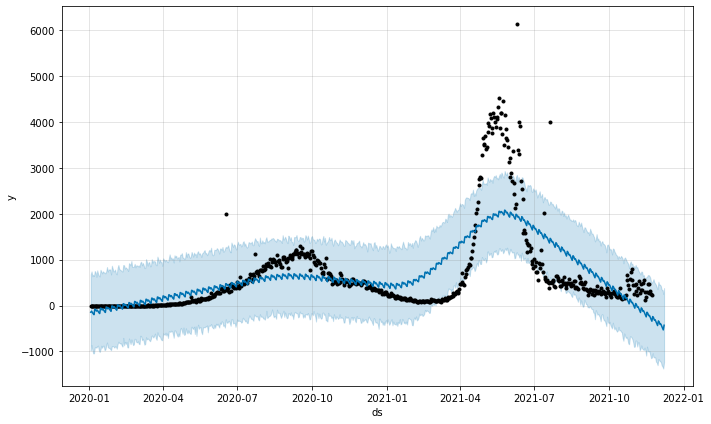

In [222]:
prophet_model.plot(forecast_new_death)
plt.show()

In [223]:
prophet_new_death_mae = mean_absolute_error(prophet_NewDeath_test.y,forecast_new_death.yhat[-15:])
print('Mean Absolute Error  : ',prophet_new_death_mae)

Mean Absolute Error  :  902.5056935047744


### Our Model performance is very Poor as Prophet is more robust to the Outlier

#### FITTING PROPHET WITH LESS TRAINING SET

In [224]:
prophet_model_1 = Prophet()
prophet_model_1.fit(prophet_NewDeath_train[-120:])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [225]:
future_new_death = prophet_model_1.make_future_dataframe(periods=15, freq='D')

In [226]:
forecast_new_death = prophet_model_1.predict(future_new_death)

In [227]:
forecast_new_death.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
130 2021-12-04  349.486482  234.309343  504.133162   347.593855   351.272308   
131 2021-12-05  349.891208  208.893422  475.528491   347.671184   351.910031   
132 2021-12-06  350.295934  139.674693  401.113533   347.739765   352.602978   
133 2021-12-07  350.700660  138.588082  423.791006   347.853466   353.303992   
134 2021-12-08  351.105386  239.554880  519.933377   347.991853   354.064549   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
130       27.842255             27.842255             27.842255  27.842255   
131       -2.204541             -2.204541             -2.204541  -2.204541   
132      -84.710167            -84.710167            -84.710167 -84.710167   
133      -70.728847            -70.728847            -70.728847 -70.728847   
134       33.921626             33.921626             33.921626  33.921626   

     weekly_lower  weekly_upper  multiplicative_terms  \
130     27.842255     27.842255                   0.0   
131     -2.204541     -2.204541                   0.0   
132    -84.710167    -84.710167                   0.0   
133    -70.728847    -70.728847                   0.0   
134     33.921626     33.921626                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
130                         0.0                         0.0  377.328738  
131                         0.0                         0.0  347.686667  
132                         0.0                         0.0  265.585767  
133                         0.0                         0.0  279.971813  
134                         0.0                         0.0  385.027012

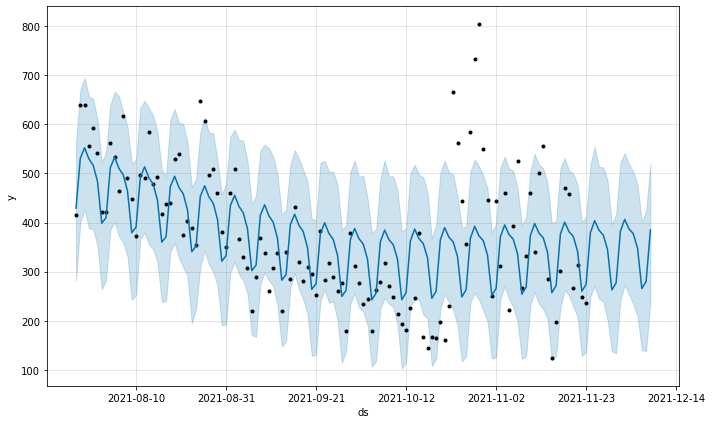

In [228]:
prophet_model_1.plot(forecast_new_death)
plt.show()

In [229]:
prophet_new_death_mae_lessData = mean_absolute_error(prophet_NewDeath_test.y,forecast_new_death.yhat[-15:])
print('Mean Absolute Error  : ',prophet_new_death_mae_lessData)

Mean Absolute Error  :  241.9806862937524


####  FBProphet adopts successively progression, and avoid outliers during modeling and forecasting. The results also depicts that FBProphet can fit well in case of less data. 

In [230]:
ml_df_y = ml_df['New_deaths']
ml_df_X = ml_df.drop('New_deaths',axis=1)

In [231]:
ml_df_X_train = ml_df_X[:-15]
ml_df_X_test = ml_df_X[-15:]

ml_df_y_train = ml_df_y[:-15]
ml_df_y_test = ml_df_y[-15:]

In [232]:
print('Training Data X : ',ml_df_X_train.shape)
print('Training Data y : ',ml_df_y_train.shape)
print('Testing Data X : ',ml_df_X_test.shape)
print('Testing Data y : ',ml_df_y_test.shape)

Training Data X :  (691, 6)
Training Data y :  (691,)
Testing Data X :  (15, 6)
Testing Data y :  (15,)


In [233]:
from sklearn.ensemble import GradientBoostingRegressor

In [234]:
gbBoost_model = GradientBoostingRegressor(n_estimators=8000, learning_rate=0.01,
                                     max_depth=3, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42)

gbBoost_model.fit(ml_df_X_train,ml_df_y_train)
gbBoost_predict = gbBoost_model.predict(ml_df_X_test)

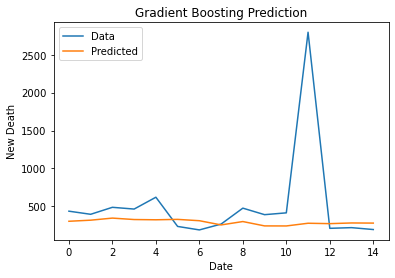

In [235]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),gbBoost_predict)
plt.title('Gradient Boosting Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Death')
plt.show()

In [236]:
gbBoost_new_death_mae = mean_absolute_error(ml_df_y_test,gbBoost_predict)
print('Mean Absolute Error  : ',gbBoost_new_death_mae)

Mean Absolute Error  :  282.5207416370271


In [237]:
from xgboost import XGBRegressor

In [238]:
xgb_model = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7)

xgb_model.fit(ml_df_X_train,ml_df_y_train)
xgb_predict = xgb_model.predict(ml_df_X_test)

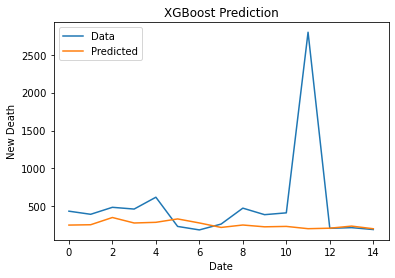

In [239]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),xgb_predict)
plt.title('XGBoost Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Death')
plt.show()

In [240]:
xgBoost_new_death_mae = mean_absolute_error(ml_df_y_test,xgb_predict)
print('Mean Absolute Error  : ',xgBoost_new_death_mae)

Mean Absolute Error  :  292.56146443684895


### Deep Leaning Modeling

In [241]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout,RNN

In [242]:
def fit_LSTM(ml_df_X_train, ml_df_y_train, epochs):
    
    regressor = Sequential()

    regressor.add(LSTM(units = 45, return_sequences = True, input_shape = (ml_df_X_train.shape[1], 1)))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45, return_sequences = True))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45, return_sequences = True))
#     regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 45))
#     regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(loss='mean_absolute_error', optimizer='adam')
    
    regressor.fit(ml_df_X_train, ml_df_y_train, epochs=epochs, batch_size=64, verbose=1)
    return regressor

In [243]:
model1 = fit_LSTM(ml_df_X_train, ml_df_y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 4s 15ms/step - loss: 674.3384
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 672.7928
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 669.4935
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 667.6389
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 666.7192
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 666.0905
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 665.5464
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 665.0541
Epoch 9/100
11/11 [==============================] - 0s 13ms/step - loss: 664.6013
Epoch 10/100
11/11 [==============================] - 0s 11ms/step - loss: 664.1545
Epoch 11/100
11/11 [==============================] - 0s 12ms/step - loss: 663.7195
Epoch 12/100
11/11 [==============================] - 0s 12ms/step - loss: 663.3092
E

11/11 [==============================] - 0s 13ms/step - loss: 633.0554
Epoch 99/100
11/11 [==============================] - 0s 14ms/step - loss: 632.7393
Epoch 100/100
11/11 [==============================] - 0s 10ms/step - loss: 632.4147


In [244]:
lstm_predict = model1.predict(ml_df_X_test)

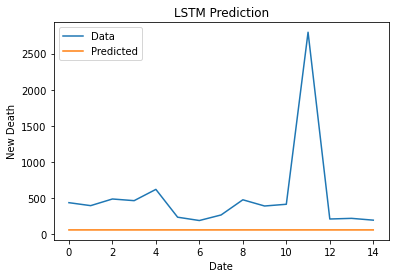

In [246]:
plt.plot(range(15),ml_df_y_test)
plt.plot(range(15),lstm_predict)
plt.title('LSTM Prediction')
plt.legend(['Data','Predicted'])
plt.xlabel('Date')
plt.ylabel('New Death')
plt.show()

In [247]:
lstm_new_death_mae = mean_absolute_error(ml_df_y_test,lstm_predict)
print('Mean Absolute Error  : ',lstm_new_death_mae)

Mean Absolute Error  :  460.35386657714844


### RESULTS OF MODELS ON NEW CASES

In [237]:
New_death_result = pd.DataFrame([['ARIMA (1,0,1)',mae_arima_1_death],['ARIMA (2,0,5)',mae_arima_2_death],['ARIMA (2,0,10)',mae_arima_3_death]
                                 ,['ARIMA (2,0,20)',mae_arima_4_death],['ARIMA (2,0,25)',mae_arima_5_death],['ARIMA (2,0,30)',mae_arima_6_death]
                                 ,['ARIMA (5,0,40)',mae_arima_7_death],['ARIMA (5,0,20)',mae_arima_8_death],['AUTO ARIMA ',auto_arima_mae_death]
                                 ,['PROPHET (ENTIRE DATASET)',prophet_new_death_mae],['PROPHET (100 DATASET)',prophet_new_death_mae_lessData]
                                 ,['Gradient Boost',gbBoost_new_death_mae],['XGBoost',xgBoost_new_death_mae],['LSTM',lstm_new_death_mae]], columns=['Model','MEAN ABSOLUTE ERROR'])

In [238]:
New_death_result

Model  MEAN ABSOLUTE ERROR
0              ARIMA (1,0,1)           293.469547
1              ARIMA (2,0,5)           291.920625
2             ARIMA (2,0,10)           290.358216
3             ARIMA (2,0,20)           264.817548
4             ARIMA (2,0,25)           307.688013
5             ARIMA (2,0,30)           340.314049
6             ARIMA (5,0,40)           354.706802
7             ARIMA (5,0,20)           245.944827
8                AUTO ARIMA            292.489155
9   PROPHET (ENTIRE DATASET)           902.505694
10     PROPHET (100 DATASET)           241.980686
11            Gradient Boost           282.520742
12                   XGBoost           292.561464
13                      LSTM           461.008325

## FINAL OUTPUT ANALYSIS

#### MODEL PERFORMANCE ON NEW CASES 

In [239]:
New_cases_result.sort_values(by='MEAN ABSOLUTE ERROR')

Model  MEAN ABSOLUTE ERROR
7             ARIMA (5,0,20)           605.358332
3             ARIMA (2,0,20)           692.752369
6             ARIMA (5,0,40)           701.400309
5             ARIMA (2,0,30)           788.124576
0              ARIMA (1,0,1)           801.316360
1              ARIMA (2,0,5)           862.787907
2             ARIMA (2,0,10)           990.359782
4             ARIMA (2,0,25)          1295.575125
8                AUTO ARIMA           1488.290487
12                   XGBoost          3410.992480
11            Gradient Boost          5066.375443
10     PROPHET (100 DATASET)          5088.208520
13                      LSTM          8629.286709
9   PROPHET (ENTIRE DATASET)         39592.553338

### AFTER THE ANALYSIS OF SEVERAL MODEL WE FOUND THAT ARIMA (5,0,20) IS BEST IN PREDICTING THE UPCOMING COVID CASES AS OF NOW WITH THE MEAN ABSOLUTE ERROR OF 605.359

#### MODEL PERFORMANCE OF NEW DEATH

In [240]:
New_death_result.sort_values(by='MEAN ABSOLUTE ERROR')

Model  MEAN ABSOLUTE ERROR
10     PROPHET (100 DATASET)           241.980686
7             ARIMA (5,0,20)           245.944827
3             ARIMA (2,0,20)           264.817548
11            Gradient Boost           282.520742
2             ARIMA (2,0,10)           290.358216
1              ARIMA (2,0,5)           291.920625
8                AUTO ARIMA            292.489155
12                   XGBoost           292.561464
0              ARIMA (1,0,1)           293.469547
4             ARIMA (2,0,25)           307.688013
5             ARIMA (2,0,30)           340.314049
6             ARIMA (5,0,40)           354.706802
13                      LSTM           461.008325
9   PROPHET (ENTIRE DATASET)           902.505694

### AFTER THE ANALYSIS OF SEVERAL MODEL WE FOUND THAT PROPHET WITH PAST 100 RECORDS IS BEST IN PREDICTING THE UPCOMING DEATH CASES AS OF NOW WITH THE MEAN ABSOLUTE ERROR OF 241.980

## FORCASTING NEW CASES

In [297]:
forcasting_cases = ARIMA(df_india_New_cases_log,order=(5,0,20))
forcasting_cases = forcasting_cases.fit()
forcasting_cases.summary()

/home/local/ZOHOCORP/prithivi-pt4242/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New_cases   No. Observations:                  679
Model:                ARIMA(5, 0, 20)   Log Likelihood                 153.171
Date:                Mon, 10 Jan 2022   AIC                           -252.341
Time:                        01:25:00   BIC                           -130.285
Sample:                    01-30-2020   HQIC                          -205.093
                         - 12-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3407      3.240      2.883      0.004       2.991      15.691
ar.L1          1.0800      0.091     11.826      0.000       0.901       1.259
ar.L2         -0.9605      0.145     -6.622      0.000      -1.245      -0.676
ar.L3          1.0929      0.127      8.608      0.000       0.844       1.342
ar.L4         -0.2965      0.142     -2.082      0.037      -0.576      -0.017
ar.L5          0.0784      0.092      0.849      0.396      -0.103       0.259
ma.L1         -0.6751      0.088     -7.666      0.000      -0.848      -0.502
ma.L2          0.9644      0.112      8.619      0.000       0.745       1.184
ma.L3         -0.7806      0.110     -7.097      0.000      -0.996      -0.565
ma.L4          0.3604      0.125      2.884      0.004       0.116       0.605
ma.L5         -0.0960      0.074     -1.290      0.197      -0.242       0.050
ma.L6         -0.0128      0.049     -0.262      0.793      -0.109       0.083
ma.L7          0.3158      0.046      6.799      0.000       0.225       0.407
ma.L8         -0.0880      0.050     -1.742      0.081      -0.187       0.011
ma.L9          0.2379      0.052      4.535      0.000       0.135       0.341
ma.L10        -0.3074      0.050     -6.119      0.000      -0.406      -0.209
ma.L11         0.3711      0.054      6.865      0.000       0.265       0.477
ma.L12        -0.3584      0.061     -5.833      0.000      -0.479      -0.238
ma.L13         0.6175      0.063      9.828      0.000       0.494       0.741
ma.L14        -0.1942      0.078     -2.505      0.012      -0.346      -0.042
ma.L15         0.2236      0.067      3.352      0.001       0.093       0.354
ma.L16        -0.1490      0.048     -3.082      0.002      -0.244      -0.054
ma.L17         0.0264      0.052      0.511      0.609      -0.075       0.128
ma.L18         0.0504      0.042      1.202      0.229      -0.032       0.133
ma.L19        -0.0684      0.035     -1.956      0.051      -0.137       0.000
ma.L20         0.3224      0.035      9.156      0.000       0.253       0.391
sigma2         0.0363      0.001     27.087      0.000       0.034       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             19210.51
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [298]:
next_12_days_prediction = np.exp(forcasting_cases.predict(start = '2021-11-08' ,end = '2021-12-20'))

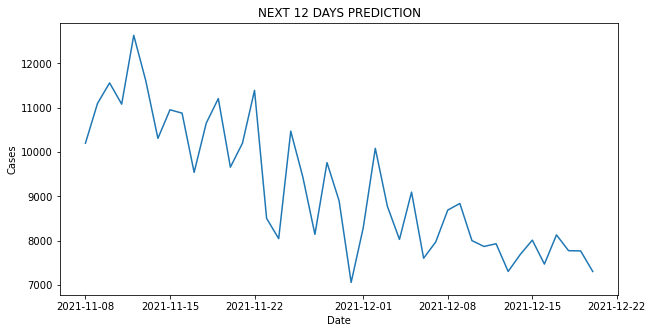

In [300]:
plt.figure(figsize=(10,5))
plt.plot(next_12_days_prediction)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('NEXT 12 DAYS PREDICTION')
plt.show()

### FORCASTING NEW DEATH

In [301]:
forcasting_death = Prophet()
forcasting_death.fit(prophet_NewDeath[-120:])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [302]:
future_new_death = forcasting_death.make_future_dataframe(periods=12, freq='D')

In [303]:
next_12_days_prediction = forcasting_death.predict(future_new_death)

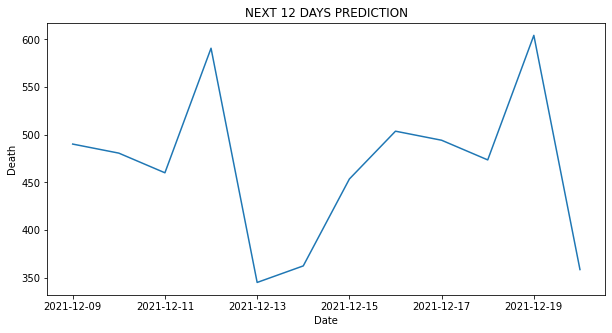

In [304]:
plt.figure(figsize=(10,5))
plt.plot(next_12_days_prediction[-12:]['ds'],next_12_days_prediction[-12:]['yhat'])
plt.xlabel('Date')
plt.ylabel('Death')
plt.title('NEXT 12 DAYS PREDICTION')
plt.show()